# INTEGRATE Timing Analysis Example

This example demonstrates how to perform comprehensive timing analysis of the INTEGRATE workflow
using the built-in timing_compute() and timing_plot() functions. 

The timing analysis benchmarks four main components:
1. Prior model generation (layered geological models)
2. Forward modeling using GA-AEM electromagnetic simulation  
3. Rejection sampling for Bayesian inversion
4. Posterior statistics computation

Results are automatically saved and comprehensive plots are generated showing:
- Performance scaling with dataset size and processor count
- Speedup analysis and parallel efficiency
- Comparisons with traditional least squares and MCMC methods
- Component-wise timing breakdowns

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
import time

# Check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


## Quick Timing Test

This example runs a quick timing test with a small subset of dataset sizes 
and processor counts to demonstrate the timing functions.

In [3]:
print("# Running Quick Timing Test")
print("="*50)

# Define test parameters - small arrays for quick demonstration
N_arr_quick = [100, 1000, 10000]  # Small dataset sizes for quick test
Nproc_arr_quick = [1, 2, 4, 8]     # Limited processor counts

# Run timing computation
timing_file = ig.timing_compute(N_arr=N_arr_quick, Nproc_arr=Nproc_arr_quick)

print(f"\nTiming results saved to: {timing_file}")

# Running Quick Timing Test
Notebook detected. Parallel processing is OK
# TIMING TEST
Hostname (system): d52534 (Linux) 
Number of processors: 24
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex
Testing on 3 data sets of size(s): [100, 1000, 10000]
Testing on 4 sets of core(s): [1, 2, 4, 8]
Writing results to timing_d52534-Linux-24core_Nproc4_N3.npz 
TIMING: N=100, Ncpu=1, Ncpu_min=0


prior_layered:   0%|                                                                                | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                                    | 0/100 [00:00<?, ?it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████▌                         | 66/100 [00:01<00:00, 65.62it/s]

prior_data_gaaem: Time=  1.8s/100 soundings. 18.0ms/sounding, 55.6it/s


Rejection Sampling:   0%|                                                                         | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:  10%|█████▋                                                     | 1137/11693 [00:00<00:00, 11369.20it/s]

Rejection Sampling:  20%|███████████▌                                               | 2291/11693 [00:00<00:00, 11467.28it/s]

Rejection Sampling:  29%|█████████████████▍                                         | 3449/11693 [00:00<00:00, 11514.70it/s]

Rejection Sampling:  39%|███████████████████████▏                                   | 4601/11693 [00:00<00:00, 11375.87it/s]

Rejection Sampling:  49%|████████████████████████████▉                              | 5739/11693 [00:00<00:00, 11306.56it/s]

Rejection Sampling:  59%|██████████████████████████████████▊                        | 6906/11693 [00:00<00:00, 11425.78it/s]

Rejection Sampling:  69%|████████████████████████████████████████▋                  | 8066/11693 [00:00<00:00, 11479.70it/s]

Rejection Sampling:  79%|██████████████████████████████████████████████▋            | 9243/11693 [00:00<00:00, 11569.64it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████▌      | 10401/11693 [00:00<00:00, 11570.52it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████▎| 11561/11693 [00:01<00:00, 11578.43it/s]

integrate_rejection: Time=  1.0s/11693 soundings,  0.1ms/sounding, 11348.9it/s. T_av=2490.4, EV_av=-708.2


TIMING: N=1000, Ncpu=1, Ncpu_min=0


prior_layered:   0%|                                                                               | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                                   | 0/1000 [00:00<?, ?it/s]

gatdaem1d:   6%|████▋                                                                     | 63/1000 [00:01<00:14, 62.85it/s]

gatdaem1d:  13%|█████████▍                                                               | 129/1000 [00:02<00:13, 64.51it/s]

gatdaem1d:  20%|██████████████▎                                                          | 196/1000 [00:03<00:12, 65.36it/s]

gatdaem1d:  26%|███████████████████▎                                                     | 264/1000 [00:04<00:11, 66.07it/s]

gatdaem1d:  33%|████████████████████████▏                                                | 331/1000 [00:05<00:10, 66.35it/s]

gatdaem1d:  40%|█████████████████████████████▏                                           | 399/1000 [00:06<00:08, 66.81it/s]

gatdaem1d:  47%|██████████████████████████████████                                       | 466/1000 [00:07<00:08, 66.52it/s]

gatdaem1d:  53%|██████████████████████████████████████▉                                  | 533/1000 [00:08<00:07, 66.37it/s]

gatdaem1d:  60%|███████████████████████████████████████████▊                             | 600/1000 [00:09<00:06, 66.42it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▋                        | 667/1000 [00:10<00:05, 66.07it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████▌                   | 734/1000 [00:11<00:04, 65.87it/s]

gatdaem1d:  80%|██████████████████████████████████████████████████████████▍              | 800/1000 [00:12<00:03, 65.65it/s]

gatdaem1d:  87%|███████████████████████████████████████████████████████████████▏         | 866/1000 [00:13<00:02, 65.71it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████     | 932/1000 [00:14<00:01, 65.62it/s]

gatdaem1d: 100%|████████████████████████████████████████████████████████████████████████▊| 998/1000 [00:15<00:00, 65.58it/s]

prior_data_gaaem: Time= 15.5s/1000 soundings. 15.5ms/sounding, 64.7it/s


Rejection Sampling:   0%|                                                                         | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:   4%|██▌                                                          | 496/11693 [00:00<00:02, 4950.67it/s]

Rejection Sampling:   9%|█████▏                                                       | 997/11693 [00:00<00:02, 4984.41it/s]

Rejection Sampling:  13%|███████▋                                                    | 1502/11693 [00:00<00:02, 5011.58it/s]

Rejection Sampling:  17%|██████████▎                                                 | 2004/11693 [00:00<00:01, 4995.99it/s]

Rejection Sampling:  22%|████████████▉                                               | 2523/11693 [00:00<00:01, 5064.48it/s]

Rejection Sampling:  26%|███████████████▋                                            | 3056/11693 [00:00<00:01, 5152.98it/s]

Rejection Sampling:  31%|██████████████████▍                                         | 3584/11693 [00:00<00:01, 5193.87it/s]

Rejection Sampling:  35%|█████████████████████                                       | 4114/11693 [00:00<00:01, 5224.97it/s]

Rejection Sampling:  40%|███████████████████████▊                                    | 4645/11693 [00:00<00:01, 5249.50it/s]

Rejection Sampling:  44%|██████████████████████████▌                                 | 5170/11693 [00:01<00:01, 5240.30it/s]

Rejection Sampling:  49%|█████████████████████████████▏                              | 5695/11693 [00:01<00:01, 5230.34it/s]

Rejection Sampling:  53%|███████████████████████████████▉                            | 6220/11693 [00:01<00:01, 5235.19it/s]

Rejection Sampling:  58%|██████████████████████████████████▌                         | 6744/11693 [00:01<00:00, 5196.55it/s]

Rejection Sampling:  62%|█████████████████████████████████████▎                      | 7272/11693 [00:01<00:00, 5220.43it/s]

Rejection Sampling:  67%|████████████████████████████████████████                    | 7798/11693 [00:01<00:00, 5230.17it/s]

Rejection Sampling:  71%|██████████████████████████████████████████▋                 | 8326/11693 [00:01<00:00, 5243.60it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████▍              | 8853/11693 [00:01<00:00, 5250.56it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████▏           | 9379/11693 [00:01<00:00, 5248.10it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████▊         | 9911/11693 [00:01<00:00, 5267.67it/s]

Rejection Sampling:  89%|████████████████████████████████████████████████████▋      | 10438/11693 [00:02<00:00, 5267.17it/s]

Rejection Sampling:  94%|███████████████████████████████████████████████████████▎   | 10971/11693 [00:02<00:00, 5283.80it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████ | 11501/11693 [00:02<00:00, 5285.67it/s]

integrate_rejection: Time=  2.3s/11693 soundings,  0.2ms/sounding, 5174.2it/s. T_av=347.9, EV_av=-261.8


TIMING: N=10000, Ncpu=1, Ncpu_min=1


prior_layered:   0%|                                                                              | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 1 parallel threads.


gatdaem1d:   0%|                                                                                  | 0/10000 [00:00<?, ?it/s]

gatdaem1d:   1%|▍                                                                        | 68/10000 [00:01<02:28, 66.99it/s]

gatdaem1d:   1%|▉                                                                       | 135/10000 [00:02<02:30, 65.74it/s]

gatdaem1d:   2%|█▍                                                                      | 202/10000 [00:03<02:28, 66.17it/s]

gatdaem1d:   3%|█▉                                                                      | 269/10000 [00:04<02:28, 65.71it/s]

gatdaem1d:   3%|██▍                                                                     | 336/10000 [00:05<02:26, 65.89it/s]

gatdaem1d:   4%|██▉                                                                     | 404/10000 [00:06<02:24, 66.41it/s]

gatdaem1d:   5%|███▍                                                                    | 471/10000 [00:07<02:24, 66.11it/s]

gatdaem1d:   5%|███▉                                                                    | 539/10000 [00:08<02:22, 66.57it/s]

gatdaem1d:   6%|████▎                                                                   | 606/10000 [00:09<02:21, 66.41it/s]

gatdaem1d:   7%|████▊                                                                   | 673/10000 [00:10<02:20, 66.30it/s]

gatdaem1d:   7%|█████▎                                                                  | 740/10000 [00:11<02:19, 66.41it/s]

gatdaem1d:   8%|█████▊                                                                  | 807/10000 [00:12<02:18, 66.38it/s]

gatdaem1d:   9%|██████▎                                                                 | 874/10000 [00:13<02:18, 65.92it/s]

gatdaem1d:   9%|██████▊                                                                 | 942/10000 [00:14<02:16, 66.36it/s]

gatdaem1d:  10%|███████▏                                                               | 1009/10000 [00:15<02:15, 66.40it/s]

gatdaem1d:  11%|███████▋                                                               | 1076/10000 [00:16<02:14, 66.45it/s]

gatdaem1d:  11%|████████                                                               | 1143/10000 [00:17<02:13, 66.30it/s]

gatdaem1d:  12%|████████▌                                                              | 1211/10000 [00:18<02:11, 66.63it/s]

gatdaem1d:  13%|█████████                                                              | 1278/10000 [00:19<02:11, 66.32it/s]

gatdaem1d:  13%|█████████▌                                                             | 1345/10000 [00:20<02:10, 66.15it/s]

gatdaem1d:  14%|██████████                                                             | 1412/10000 [00:21<02:09, 66.13it/s]

gatdaem1d:  15%|██████████▌                                                            | 1479/10000 [00:22<02:08, 66.32it/s]

gatdaem1d:  15%|██████████▉                                                            | 1546/10000 [00:23<02:09, 65.37it/s]

gatdaem1d:  16%|███████████▍                                                           | 1613/10000 [00:24<02:07, 65.60it/s]

gatdaem1d:  17%|███████████▉                                                           | 1681/10000 [00:25<02:05, 66.12it/s]

gatdaem1d:  17%|████████████▍                                                          | 1748/10000 [00:26<02:05, 65.81it/s]

gatdaem1d:  18%|████████████▉                                                          | 1815/10000 [00:27<02:04, 65.90it/s]

gatdaem1d:  19%|█████████████▎                                                         | 1882/10000 [00:28<02:02, 66.09it/s]

gatdaem1d:  19%|█████████████▊                                                         | 1949/10000 [00:29<02:02, 65.70it/s]

gatdaem1d:  20%|██████████████▎                                                        | 2016/10000 [00:30<02:00, 66.08it/s]

gatdaem1d:  21%|██████████████▊                                                        | 2083/10000 [00:31<02:00, 65.94it/s]

gatdaem1d:  21%|███████████████▎                                                       | 2149/10000 [00:32<01:59, 65.93it/s]

gatdaem1d:  22%|███████████████▋                                                       | 2215/10000 [00:33<01:58, 65.55it/s]

gatdaem1d:  23%|████████████████▏                                                      | 2281/10000 [00:34<01:57, 65.56it/s]

gatdaem1d:  23%|████████████████▋                                                      | 2348/10000 [00:35<01:56, 65.82it/s]

gatdaem1d:  24%|█████████████████▏                                                     | 2416/10000 [00:36<01:54, 66.22it/s]

gatdaem1d:  25%|█████████████████▋                                                     | 2483/10000 [00:37<01:53, 66.43it/s]

gatdaem1d:  26%|██████████████████                                                     | 2550/10000 [00:38<01:52, 66.02it/s]

gatdaem1d:  26%|██████████████████▌                                                    | 2617/10000 [00:39<01:51, 65.93it/s]

gatdaem1d:  27%|███████████████████                                                    | 2684/10000 [00:40<01:50, 66.11it/s]

gatdaem1d:  28%|███████████████████▌                                                   | 2752/10000 [00:41<01:49, 66.44it/s]

gatdaem1d:  28%|████████████████████                                                   | 2819/10000 [00:42<01:48, 66.47it/s]

gatdaem1d:  29%|████████████████████▍                                                  | 2887/10000 [00:43<01:46, 66.91it/s]

gatdaem1d:  30%|████████████████████▉                                                  | 2954/10000 [00:44<01:45, 66.61it/s]

gatdaem1d:  30%|█████████████████████▍                                                 | 3021/10000 [00:45<01:44, 66.50it/s]

gatdaem1d:  31%|█████████████████████▉                                                 | 3088/10000 [00:46<01:44, 66.46it/s]

gatdaem1d:  32%|██████████████████████▍                                                | 3155/10000 [00:47<01:43, 65.86it/s]

gatdaem1d:  32%|██████████████████████▉                                                | 3222/10000 [00:48<01:42, 65.97it/s]

gatdaem1d:  33%|███████████████████████▎                                               | 3288/10000 [00:49<01:41, 65.93it/s]

gatdaem1d:  34%|███████████████████████▊                                               | 3356/10000 [00:50<01:40, 66.29it/s]

gatdaem1d:  34%|████████████████████████▎                                              | 3423/10000 [00:51<01:38, 66.44it/s]

gatdaem1d:  35%|████████████████████████▊                                              | 3490/10000 [00:52<01:38, 66.03it/s]

gatdaem1d:  36%|█████████████████████████▎                                             | 3557/10000 [00:53<01:37, 66.13it/s]

gatdaem1d:  36%|█████████████████████████▋                                             | 3624/10000 [00:54<01:36, 65.99it/s]

gatdaem1d:  37%|██████████████████████████▏                                            | 3691/10000 [00:55<01:35, 66.09it/s]

gatdaem1d:  38%|██████████████████████████▋                                            | 3758/10000 [00:56<01:34, 66.07it/s]

gatdaem1d:  38%|███████████████████████████▏                                           | 3825/10000 [00:57<01:33, 66.04it/s]

gatdaem1d:  39%|███████████████████████████▋                                           | 3892/10000 [00:58<01:32, 66.19it/s]

gatdaem1d:  40%|████████████████████████████                                           | 3959/10000 [00:59<01:31, 65.84it/s]

gatdaem1d:  40%|████████████████████████████▌                                          | 4026/10000 [01:00<01:30, 65.98it/s]

gatdaem1d:  41%|█████████████████████████████                                          | 4092/10000 [01:01<01:29, 65.91it/s]

gatdaem1d:  42%|█████████████████████████████▌                                         | 4159/10000 [01:02<01:28, 66.10it/s]

gatdaem1d:  42%|██████████████████████████████                                         | 4226/10000 [01:03<01:27, 65.90it/s]

gatdaem1d:  43%|██████████████████████████████▍                                        | 4292/10000 [01:04<01:26, 65.93it/s]

gatdaem1d:  44%|██████████████████████████████▉                                        | 4358/10000 [01:05<01:25, 65.80it/s]

gatdaem1d:  44%|███████████████████████████████▍                                       | 4424/10000 [01:06<01:24, 65.76it/s]

gatdaem1d:  45%|███████████████████████████████▉                                       | 4491/10000 [01:07<01:23, 66.00it/s]

gatdaem1d:  46%|████████████████████████████████▎                                      | 4557/10000 [01:08<01:22, 65.99it/s]

gatdaem1d:  46%|████████████████████████████████▊                                      | 4624/10000 [01:09<01:21, 66.08it/s]

gatdaem1d:  47%|█████████████████████████████████▎                                     | 4692/10000 [01:10<01:19, 66.45it/s]

gatdaem1d:  48%|█████████████████████████████████▊                                     | 4759/10000 [01:11<01:18, 66.42it/s]

gatdaem1d:  48%|██████████████████████████████████▎                                    | 4826/10000 [01:12<01:17, 66.49it/s]

gatdaem1d:  49%|██████████████████████████████████▋                                    | 4893/10000 [01:13<01:17, 66.10it/s]

gatdaem1d:  50%|███████████████████████████████████▏                                   | 4960/10000 [01:15<01:16, 66.30it/s]

gatdaem1d:  50%|███████████████████████████████████▋                                   | 5027/10000 [01:16<01:15, 65.97it/s]

gatdaem1d:  51%|████████████████████████████████████▏                                  | 5094/10000 [01:17<01:14, 66.06it/s]

gatdaem1d:  52%|████████████████████████████████████▋                                  | 5161/10000 [01:18<01:13, 65.85it/s]

gatdaem1d:  52%|█████████████████████████████████████                                  | 5228/10000 [01:19<01:12, 65.94it/s]

gatdaem1d:  53%|█████████████████████████████████████▌                                 | 5294/10000 [01:20<01:11, 65.69it/s]

gatdaem1d:  54%|██████████████████████████████████████                                 | 5362/10000 [01:21<01:10, 66.11it/s]

gatdaem1d:  54%|██████████████████████████████████████▌                                | 5429/10000 [01:22<01:09, 65.95it/s]

gatdaem1d:  55%|███████████████████████████████████████                                | 5496/10000 [01:23<01:08, 66.10it/s]

gatdaem1d:  56%|███████████████████████████████████████▍                               | 5563/10000 [01:24<01:07, 66.05it/s]

gatdaem1d:  56%|███████████████████████████████████████▉                               | 5630/10000 [01:25<01:06, 66.07it/s]

gatdaem1d:  57%|████████████████████████████████████████▍                              | 5697/10000 [01:26<01:05, 65.82it/s]

gatdaem1d:  58%|████████████████████████████████████████▉                              | 5763/10000 [01:27<01:04, 65.53it/s]

gatdaem1d:  58%|█████████████████████████████████████████▍                             | 5831/10000 [01:28<01:03, 65.96it/s]

gatdaem1d:  59%|█████████████████████████████████████████▉                             | 5898/10000 [01:29<01:02, 66.12it/s]

gatdaem1d:  60%|██████████████████████████████████████████▎                            | 5965/10000 [01:30<01:01, 65.84it/s]

gatdaem1d:  60%|██████████████████████████████████████████▊                            | 6032/10000 [01:31<01:00, 65.98it/s]

gatdaem1d:  61%|███████████████████████████████████████████▎                           | 6098/10000 [01:32<00:59, 65.90it/s]

gatdaem1d:  62%|███████████████████████████████████████████▊                           | 6166/10000 [01:33<00:57, 66.39it/s]

gatdaem1d:  62%|████████████████████████████████████████████▎                          | 6233/10000 [01:34<00:56, 66.36it/s]

gatdaem1d:  63%|████████████████████████████████████████████▋                          | 6301/10000 [01:35<00:55, 66.69it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▏                         | 6368/10000 [01:36<00:54, 66.43it/s]

gatdaem1d:  64%|█████████████████████████████████████████████▋                         | 6435/10000 [01:37<00:53, 66.34it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▏                        | 6502/10000 [01:38<00:52, 66.30it/s]

gatdaem1d:  66%|██████████████████████████████████████████████▋                        | 6569/10000 [01:39<00:51, 66.28it/s]

gatdaem1d:  66%|███████████████████████████████████████████████                        | 6636/10000 [01:40<00:51, 65.93it/s]

gatdaem1d:  67%|███████████████████████████████████████████████▌                       | 6702/10000 [01:41<00:50, 65.90it/s]

gatdaem1d:  68%|████████████████████████████████████████████████                       | 6768/10000 [01:42<00:49, 65.85it/s]

gatdaem1d:  68%|████████████████████████████████████████████████▌                      | 6835/10000 [01:43<00:47, 66.01it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████                      | 6902/10000 [01:44<00:46, 66.12it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▍                     | 6969/10000 [01:45<00:45, 65.98it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████▉                     | 7035/10000 [01:46<00:45, 65.84it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████▍                    | 7101/10000 [01:47<00:44, 65.83it/s]

gatdaem1d:  72%|██████████████████████████████████████████████████▉                    | 7167/10000 [01:48<00:43, 65.85it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▎                   | 7234/10000 [01:49<00:41, 66.06it/s]

gatdaem1d:  73%|███████████████████████████████████████████████████▊                   | 7301/10000 [01:50<00:40, 66.01it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▎                  | 7368/10000 [01:51<00:39, 66.15it/s]

gatdaem1d:  74%|████████████████████████████████████████████████████▊                  | 7435/10000 [01:52<00:38, 66.38it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████▎                 | 7502/10000 [01:53<00:37, 65.94it/s]

gatdaem1d:  76%|█████████████████████████████████████████████████████▋                 | 7569/10000 [01:54<00:36, 66.08it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▏                | 7636/10000 [01:55<00:35, 66.12it/s]

gatdaem1d:  77%|██████████████████████████████████████████████████████▋                | 7703/10000 [01:56<00:34, 66.14it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████▏               | 7770/10000 [01:57<00:33, 66.23it/s]

gatdaem1d:  78%|███████████████████████████████████████████████████████▋               | 7837/10000 [01:58<00:32, 66.22it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████               | 7904/10000 [01:59<00:31, 66.14it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████▌              | 7971/10000 [02:00<00:30, 66.13it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████              | 8039/10000 [02:01<00:29, 66.42it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████▌             | 8106/10000 [02:02<00:28, 65.85it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████             | 8173/10000 [02:03<00:27, 66.02it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████▌            | 8240/10000 [02:04<00:26, 65.93it/s]

gatdaem1d:  83%|██████████████████████████████████████████████████████████▉            | 8308/10000 [02:05<00:25, 66.35it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▍           | 8375/10000 [02:06<00:24, 66.22it/s]

gatdaem1d:  84%|███████████████████████████████████████████████████████████▉           | 8442/10000 [02:07<00:23, 66.25it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████▍          | 8509/10000 [02:08<00:22, 66.35it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████▉          | 8576/10000 [02:09<00:21, 65.82it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▎         | 8642/10000 [02:10<00:20, 65.49it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████▊         | 8708/10000 [02:11<00:19, 65.58it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████▎        | 8775/10000 [02:12<00:18, 66.00it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████▊        | 8842/10000 [02:13<00:17, 65.65it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████▎       | 8909/10000 [02:14<00:16, 65.78it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████▋       | 8976/10000 [02:15<00:15, 65.94it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▏      | 9042/10000 [02:16<00:14, 65.79it/s]

gatdaem1d:  91%|████████████████████████████████████████████████████████████████▋      | 9109/10000 [02:17<00:13, 65.95it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████▏     | 9176/10000 [02:18<00:12, 66.14it/s]

gatdaem1d:  92%|█████████████████████████████████████████████████████████████████▋     | 9243/10000 [02:19<00:11, 66.07it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████     | 9310/10000 [02:20<00:10, 65.88it/s]

gatdaem1d:  94%|██████████████████████████████████████████████████████████████████▌    | 9376/10000 [02:21<00:09, 65.67it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████    | 9442/10000 [02:22<00:08, 65.16it/s]

gatdaem1d:  95%|███████████████████████████████████████████████████████████████████▌   | 9508/10000 [02:23<00:07, 65.26it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████▉   | 9575/10000 [02:24<00:06, 65.70it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▍  | 9641/10000 [02:25<00:05, 65.64it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████▉  | 9708/10000 [02:26<00:04, 65.93it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████▍ | 9776/10000 [02:27<00:03, 66.39it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████▉ | 9843/10000 [02:28<00:02, 66.23it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████▎| 9910/10000 [02:30<00:01, 66.06it/s]

gatdaem1d: 100%|██████████████████████████████████████████████████████████████████████▊| 9978/10000 [02:31<00:00, 66.34it/s]

prior_data_gaaem: Time=151.6s/10000 soundings. 15.2ms/sounding, 65.9it/s


Rejection Sampling:   0%|                                                                         | 0/11693 [00:00<?, ?it/s]

Rejection Sampling:   1%|▍                                                              | 84/11693 [00:00<00:13, 834.57it/s]

Rejection Sampling:   1%|▉                                                             | 169/11693 [00:00<00:13, 839.49it/s]

Rejection Sampling:   2%|█▎                                                            | 253/11693 [00:00<00:13, 823.79it/s]

Rejection Sampling:   3%|█▊                                                            | 344/11693 [00:00<00:13, 854.69it/s]

Rejection Sampling:   4%|██▎                                                           | 431/11693 [00:00<00:13, 859.21it/s]

Rejection Sampling:   4%|██▊                                                           | 519/11693 [00:00<00:12, 863.91it/s]

Rejection Sampling:   5%|███▏                                                          | 606/11693 [00:00<00:12, 864.04it/s]

Rejection Sampling:   6%|███▋                                                          | 693/11693 [00:00<00:12, 861.49it/s]

Rejection Sampling:   7%|████▏                                                         | 780/11693 [00:00<00:12, 848.55it/s]

Rejection Sampling:   7%|████▌                                                         | 865/11693 [00:01<00:12, 846.92it/s]

Rejection Sampling:   8%|█████                                                         | 951/11693 [00:01<00:12, 849.94it/s]

Rejection Sampling:   9%|█████▍                                                       | 1038/11693 [00:01<00:12, 853.11it/s]

Rejection Sampling:  10%|█████▊                                                       | 1124/11693 [00:01<00:12, 854.29it/s]

Rejection Sampling:  10%|██████▎                                                      | 1211/11693 [00:01<00:12, 858.69it/s]

Rejection Sampling:  11%|██████▊                                                      | 1297/11693 [00:01<00:12, 855.16it/s]

Rejection Sampling:  12%|███████▏                                                     | 1385/11693 [00:01<00:11, 861.87it/s]

Rejection Sampling:  13%|███████▋                                                     | 1472/11693 [00:01<00:11, 856.52it/s]

Rejection Sampling:  13%|████████▏                                                    | 1558/11693 [00:01<00:11, 857.14it/s]

Rejection Sampling:  14%|████████▌                                                    | 1645/11693 [00:01<00:11, 860.51it/s]

Rejection Sampling:  15%|█████████                                                    | 1732/11693 [00:02<00:11, 861.79it/s]

Rejection Sampling:  16%|█████████▍                                                   | 1820/11693 [00:02<00:11, 864.73it/s]

Rejection Sampling:  16%|█████████▉                                                   | 1907/11693 [00:02<00:11, 865.57it/s]

Rejection Sampling:  17%|██████████▍                                                  | 1994/11693 [00:02<00:11, 862.16it/s]

Rejection Sampling:  18%|██████████▊                                                  | 2081/11693 [00:02<00:11, 863.08it/s]

Rejection Sampling:  19%|███████████▎                                                 | 2168/11693 [00:02<00:11, 864.56it/s]

Rejection Sampling:  19%|███████████▊                                                 | 2255/11693 [00:02<00:10, 865.57it/s]

Rejection Sampling:  20%|████████████▏                                                | 2342/11693 [00:02<00:10, 864.61it/s]

Rejection Sampling:  21%|████████████▋                                                | 2429/11693 [00:02<00:10, 863.09it/s]

Rejection Sampling:  22%|█████████████▏                                               | 2516/11693 [00:02<00:10, 854.90it/s]

Rejection Sampling:  22%|█████████████▌                                               | 2602/11693 [00:03<00:10, 851.72it/s]

Rejection Sampling:  23%|██████████████                                               | 2690/11693 [00:03<00:10, 857.53it/s]

Rejection Sampling:  24%|██████████████▍                                              | 2777/11693 [00:03<00:10, 858.61it/s]

Rejection Sampling:  24%|██████████████▉                                              | 2863/11693 [00:03<00:10, 847.78it/s]

Rejection Sampling:  25%|███████████████▍                                             | 2948/11693 [00:03<00:10, 848.23it/s]

Rejection Sampling:  26%|███████████████▊                                             | 3036/11693 [00:03<00:10, 855.07it/s]

Rejection Sampling:  27%|████████████████▎                                            | 3124/11693 [00:03<00:09, 860.15it/s]

Rejection Sampling:  27%|████████████████▊                                            | 3211/11693 [00:03<00:09, 860.42it/s]

Rejection Sampling:  28%|█████████████████▏                                           | 3298/11693 [00:03<00:09, 862.19it/s]

Rejection Sampling:  29%|█████████████████▋                                           | 3385/11693 [00:03<00:09, 854.41it/s]

Rejection Sampling:  30%|██████████████████                                           | 3471/11693 [00:04<00:09, 853.00it/s]

Rejection Sampling:  30%|██████████████████▌                                          | 3557/11693 [00:04<00:09, 849.95it/s]

Rejection Sampling:  31%|███████████████████                                          | 3643/11693 [00:04<00:09, 852.05it/s]

Rejection Sampling:  32%|███████████████████▍                                         | 3730/11693 [00:04<00:09, 856.64it/s]

Rejection Sampling:  33%|███████████████████▉                                         | 3817/11693 [00:04<00:09, 860.12it/s]

Rejection Sampling:  33%|████████████████████▎                                        | 3904/11693 [00:04<00:09, 862.67it/s]

Rejection Sampling:  34%|████████████████████▊                                        | 3991/11693 [00:04<00:08, 860.74it/s]

Rejection Sampling:  35%|█████████████████████▎                                       | 4078/11693 [00:04<00:08, 860.45it/s]

Rejection Sampling:  36%|█████████████████████▋                                       | 4165/11693 [00:04<00:08, 860.61it/s]

Rejection Sampling:  36%|██████████████████████▏                                      | 4252/11693 [00:04<00:08, 858.34it/s]

Rejection Sampling:  37%|██████████████████████▋                                      | 4339/11693 [00:05<00:08, 861.37it/s]

Rejection Sampling:  38%|███████████████████████                                      | 4426/11693 [00:05<00:08, 854.05it/s]

Rejection Sampling:  39%|███████████████████████▌                                     | 4512/11693 [00:05<00:08, 848.76it/s]

Rejection Sampling:  39%|███████████████████████▉                                     | 4597/11693 [00:05<00:08, 848.74it/s]

Rejection Sampling:  40%|████████████████████████▍                                    | 4683/11693 [00:05<00:08, 849.60it/s]

Rejection Sampling:  41%|████████████████████████▊                                    | 4768/11693 [00:05<00:08, 849.36it/s]

Rejection Sampling:  42%|█████████████████████████▎                                   | 4855/11693 [00:05<00:08, 853.05it/s]

Rejection Sampling:  42%|█████████████████████████▊                                   | 4941/11693 [00:05<00:07, 853.14it/s]

Rejection Sampling:  43%|██████████████████████████▏                                  | 5028/11693 [00:05<00:07, 856.95it/s]

Rejection Sampling:  44%|██████████████████████████▋                                  | 5115/11693 [00:05<00:07, 859.58it/s]

Rejection Sampling:  44%|███████████████████████████▏                                 | 5202/11693 [00:06<00:07, 860.07it/s]

Rejection Sampling:  45%|███████████████████████████▌                                 | 5289/11693 [00:06<00:07, 862.50it/s]

Rejection Sampling:  46%|████████████████████████████                                 | 5376/11693 [00:06<00:07, 864.54it/s]

Rejection Sampling:  47%|████████████████████████████▍                                | 5463/11693 [00:06<00:07, 860.48it/s]

Rejection Sampling:  47%|████████████████████████████▉                                | 5550/11693 [00:06<00:07, 848.79it/s]

Rejection Sampling:  48%|█████████████████████████████▍                               | 5637/11693 [00:06<00:07, 852.31it/s]

Rejection Sampling:  49%|█████████████████████████████▊                               | 5725/11693 [00:06<00:06, 858.46it/s]

Rejection Sampling:  50%|██████████████████████████████▎                              | 5811/11693 [00:06<00:06, 852.67it/s]

Rejection Sampling:  50%|██████████████████████████████▊                              | 5897/11693 [00:06<00:06, 853.59it/s]

Rejection Sampling:  51%|███████████████████████████████▏                             | 5983/11693 [00:06<00:06, 849.28it/s]

Rejection Sampling:  52%|███████████████████████████████▋                             | 6070/11693 [00:07<00:06, 853.44it/s]

Rejection Sampling:  53%|████████████████████████████████                             | 6156/11693 [00:07<00:06, 853.70it/s]

Rejection Sampling:  53%|████████████████████████████████▌                            | 6243/11693 [00:07<00:06, 856.26it/s]

Rejection Sampling:  54%|█████████████████████████████████                            | 6330/11693 [00:07<00:06, 859.74it/s]

Rejection Sampling:  55%|█████████████████████████████████▍                           | 6417/11693 [00:07<00:06, 859.77it/s]

Rejection Sampling:  56%|█████████████████████████████████▉                           | 6504/11693 [00:07<00:06, 861.18it/s]

Rejection Sampling:  56%|██████████████████████████████████▍                          | 6591/11693 [00:07<00:05, 863.65it/s]

Rejection Sampling:  57%|██████████████████████████████████▊                          | 6679/11693 [00:07<00:05, 865.82it/s]

Rejection Sampling:  58%|███████████████████████████████████▎                         | 6767/11693 [00:07<00:05, 867.57it/s]

Rejection Sampling:  59%|███████████████████████████████████▊                         | 6854/11693 [00:07<00:05, 862.98it/s]

Rejection Sampling:  59%|████████████████████████████████████▏                        | 6941/11693 [00:08<00:05, 864.74it/s]

Rejection Sampling:  60%|████████████████████████████████████▋                        | 7029/11693 [00:08<00:05, 866.96it/s]

Rejection Sampling:  61%|█████████████████████████████████████                        | 7116/11693 [00:08<00:05, 862.85it/s]

Rejection Sampling:  62%|█████████████████████████████████████▌                       | 7204/11693 [00:08<00:05, 864.98it/s]

Rejection Sampling:  62%|██████████████████████████████████████                       | 7291/11693 [00:08<00:05, 865.99it/s]

Rejection Sampling:  63%|██████████████████████████████████████▍                      | 7378/11693 [00:08<00:04, 865.09it/s]

Rejection Sampling:  64%|██████████████████████████████████████▉                      | 7465/11693 [00:08<00:04, 864.91it/s]

Rejection Sampling:  65%|███████████████████████████████████████▍                     | 7552/11693 [00:08<00:04, 860.87it/s]

Rejection Sampling:  65%|███████████████████████████████████████▊                     | 7639/11693 [00:08<00:04, 858.82it/s]

Rejection Sampling:  66%|████████████████████████████████████████▎                    | 7725/11693 [00:09<00:04, 852.73it/s]

Rejection Sampling:  67%|████████████████████████████████████████▊                    | 7812/11693 [00:09<00:04, 857.49it/s]

Rejection Sampling:  68%|█████████████████████████████████████████▏                   | 7899/11693 [00:09<00:04, 858.29it/s]

Rejection Sampling:  68%|█████████████████████████████████████████▋                   | 7986/11693 [00:09<00:04, 858.88it/s]

Rejection Sampling:  69%|██████████████████████████████████████████                   | 8073/11693 [00:09<00:04, 860.86it/s]

Rejection Sampling:  70%|██████████████████████████████████████████▌                  | 8160/11693 [00:09<00:04, 849.10it/s]

Rejection Sampling:  71%|███████████████████████████████████████████                  | 8245/11693 [00:09<00:04, 848.11it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▍                 | 8332/11693 [00:09<00:03, 852.98it/s]

Rejection Sampling:  72%|███████████████████████████████████████████▉                 | 8418/11693 [00:09<00:03, 850.92it/s]

Rejection Sampling:  73%|████████████████████████████████████████████▎                | 8505/11693 [00:09<00:03, 854.39it/s]

Rejection Sampling:  73%|████████████████████████████████████████████▊                | 8591/11693 [00:10<00:03, 849.02it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▎               | 8676/11693 [00:10<00:03, 848.27it/s]

Rejection Sampling:  75%|█████████████████████████████████████████████▋               | 8763/11693 [00:10<00:03, 852.90it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████▏              | 8850/11693 [00:10<00:03, 855.59it/s]

Rejection Sampling:  76%|██████████████████████████████████████████████▌              | 8937/11693 [00:10<00:03, 857.29it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████              | 9024/11693 [00:10<00:03, 859.12it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████▌             | 9111/11693 [00:10<00:02, 862.30it/s]

Rejection Sampling:  79%|███████████████████████████████████████████████▉             | 9198/11693 [00:10<00:02, 862.60it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▍            | 9285/11693 [00:10<00:02, 858.99it/s]

Rejection Sampling:  80%|████████████████████████████████████████████████▉            | 9371/11693 [00:10<00:02, 856.48it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████▎           | 9457/11693 [00:11<00:02, 856.84it/s]

Rejection Sampling:  82%|█████████████████████████████████████████████████▊           | 9543/11693 [00:11<00:02, 855.50it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▏          | 9629/11693 [00:11<00:02, 853.13it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████████▋          | 9721/11693 [00:11<00:02, 871.29it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▏         | 9810/11693 [00:11<00:02, 876.27it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████▋         | 9899/11693 [00:11<00:02, 878.20it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████         | 9987/11693 [00:11<00:01, 873.79it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████▋        | 10075/11693 [00:11<00:01, 866.89it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████▏       | 10162/11693 [00:11<00:01, 854.42it/s]

Rejection Sampling:  88%|████████████████████████████████████████████████████▌       | 10248/11693 [00:11<00:01, 851.85it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████       | 10335/11693 [00:12<00:01, 855.86it/s]

Rejection Sampling:  89%|█████████████████████████████████████████████████████▍      | 10422/11693 [00:12<00:01, 859.55it/s]

Rejection Sampling:  90%|█████████████████████████████████████████████████████▉      | 10511/11693 [00:12<00:01, 866.19it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████████▍     | 10598/11693 [00:12<00:01, 860.51it/s]

Rejection Sampling:  91%|██████████████████████████████████████████████████████▊     | 10685/11693 [00:12<00:01, 857.32it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████████▎    | 10771/11693 [00:12<00:01, 846.81it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████▋    | 10857/11693 [00:12<00:00, 849.51it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████▏   | 10942/11693 [00:12<00:00, 848.21it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████▌   | 11033/11693 [00:12<00:00, 864.71it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████   | 11120/11693 [00:12<00:00, 860.98it/s]

Rejection Sampling:  96%|█████████████████████████████████████████████████████████▌  | 11207/11693 [00:13<00:00, 856.00it/s]

Rejection Sampling:  97%|█████████████████████████████████████████████████████████▉  | 11294/11693 [00:13<00:00, 858.13it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████▍ | 11380/11693 [00:13<00:00, 857.67it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████▊ | 11466/11693 [00:13<00:00, 857.99it/s]

Rejection Sampling:  99%|███████████████████████████████████████████████████████████▎| 11554/11693 [00:13<00:00, 861.84it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████▋| 11641/11693 [00:13<00:00, 862.43it/s]

integrate_rejection: Time= 13.6s/11693 soundings,  1.2ms/sounding, 857.0it/s. T_av=103.5, EV_av=-136.0


TIMING: N=100, Ncpu=2, Ncpu_min=0


prior_layered:   0%|                                                                                | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                                     | 0/50 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/50 [00:00<?, ?it/s]

prior_data_gaaem: Time=  1.1s/100 soundings. 10.8ms/sounding, 92.4it/s


Rejection Sampling:   0%|                                                                          | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:  20%|███████████▋                                                | 1142/5847 [00:00<00:00, 11419.30it/s]

Rejection Sampling:  19%|███████████▌                                                | 1126/5846 [00:00<00:00, 11254.81it/s]

Rejection Sampling:  39%|███████████████████████▍                                    | 2289/5847 [00:00<00:00, 11446.06it/s]

Rejection Sampling:  39%|███████████████████████                                     | 2252/5846 [00:00<00:00, 11223.10it/s]

Rejection Sampling:  59%|███████████████████████████████████▏                        | 3434/5847 [00:00<00:00, 11378.06it/s]

Rejection Sampling:  58%|██████████████████████████████████▊                         | 3392/5846 [00:00<00:00, 11301.11it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████▉             | 4579/5847 [00:00<00:00, 11404.28it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████▌             | 4534/5846 [00:00<00:00, 11346.46it/s]

Rejection Sampling:  98%|██████████████████████████████████████████████████████████▋ | 5720/5847 [00:00<00:00, 11325.11it/s]

Rejection Sampling:  97%|██████████████████████████████████████████████████████████▎ | 5676/5846 [00:00<00:00, 11370.42it/s]

integrate_rejection: Time=  0.6s/11693 soundings,  0.1ms/sounding, 19254.4it/s. T_av=1955.0, EV_av=-793.2


TIMING: N=1000, Ncpu=2, Ncpu_min=0


prior_layered:   0%|                                                                               | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                                    | 0/500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/500 [00:00<?, ?it/s]

gatdaem1d:  13%|█████████▍                                                                 | 63/500 [00:01<00:06, 62.78it/s]

gatdaem1d:  13%|█████████▌                                                                 | 64/500 [00:01<00:06, 63.07it/s]

gatdaem1d:  26%|███████████████████                                                       | 129/500 [00:02<00:05, 64.06it/s]

gatdaem1d:  25%|██████████████████▊                                                       | 127/500 [00:02<00:05, 62.92it/s]

gatdaem1d:  38%|████████████████████████████▎                                             | 191/500 [00:03<00:04, 63.16it/s]

gatdaem1d:  39%|████████████████████████████▋                                             | 194/500 [00:03<00:04, 63.59it/s]

gatdaem1d:  52%|██████████████████████████████████████▏                                   | 258/500 [00:04<00:03, 63.64it/s]

gatdaem1d:  51%|█████████████████████████████████████▋                                    | 255/500 [00:04<00:03, 62.88it/s]

gatdaem1d:  64%|███████████████████████████████████████████████                           | 318/500 [00:05<00:02, 62.84it/s]

gatdaem1d:  64%|███████████████████████████████████████████████▋                          | 322/500 [00:05<00:02, 63.14it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████▌                 | 382/500 [00:06<00:01, 62.97it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████▏                | 386/500 [00:06<00:01, 63.30it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████        | 446/500 [00:07<00:00, 63.10it/s]

gatdaem1d:  90%|██████████████████████████████████████████████████████████████████▌       | 450/500 [00:07<00:00, 63.24it/s]

prior_data_gaaem: Time=  8.2s/1000 soundings.  8.2ms/sounding, 121.5it/s


Rejection Sampling:   0%|                                                                          | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:   8%|█████▎                                                        | 496/5847 [00:00<00:01, 4951.02it/s]

Rejection Sampling:   8%|████▉                                                         | 465/5846 [00:00<00:01, 4640.18it/s]

Rejection Sampling:  17%|██████████▌                                                   | 995/5847 [00:00<00:00, 4969.56it/s]

Rejection Sampling:  16%|██████████                                                    | 943/5846 [00:00<00:01, 4722.13it/s]

Rejection Sampling:  26%|███████████████▌                                             | 1492/5847 [00:00<00:00, 4964.06it/s]

Rejection Sampling:  24%|██████████████▊                                              | 1416/5846 [00:00<00:00, 4704.36it/s]

Rejection Sampling:  34%|████████████████████▊                                        | 1989/5847 [00:00<00:00, 4962.78it/s]

Rejection Sampling:  32%|███████████████████▊                                         | 1893/5846 [00:00<00:00, 4728.58it/s]

Rejection Sampling:  43%|█████████████████████████▉                                   | 2488/5847 [00:00<00:00, 4970.64it/s]

Rejection Sampling:  40%|████████████████████████▋                                    | 2366/5846 [00:00<00:00, 4706.98it/s]

Rejection Sampling:  51%|███████████████████████████████▏                             | 2986/5847 [00:00<00:00, 4867.91it/s]

Rejection Sampling:  49%|█████████████████████████████▌                               | 2839/5846 [00:00<00:00, 4712.97it/s]

Rejection Sampling:  60%|████████████████████████████████████▎                        | 3484/5847 [00:00<00:00, 4903.53it/s]

Rejection Sampling:  57%|██████████████████████████████████▌                          | 3311/5846 [00:00<00:00, 4684.24it/s]

Rejection Sampling:  68%|█████████████████████████████████████████▌                   | 3987/5847 [00:00<00:00, 4941.24it/s]

Rejection Sampling:  65%|███████████████████████████████████████▍                     | 3780/5846 [00:00<00:00, 4659.05it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████▊              | 4482/5847 [00:00<00:00, 4868.86it/s]

Rejection Sampling:  73%|████████████████████████████████████████████▌                | 4265/5846 [00:00<00:00, 4717.61it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████         | 4986/5847 [00:01<00:00, 4919.85it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████▍           | 4740/5846 [00:01<00:00, 4724.62it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████▏   | 5487/5847 [00:01<00:00, 4944.64it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████▍      | 5213/5846 [00:01<00:00, 4721.41it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▎ | 5686/5846 [00:01<00:00, 4691.45it/s]

integrate_rejection: Time=  1.3s/11693 soundings,  0.1ms/sounding, 8858.7it/s. T_av=432.4, EV_av=-272.0


TIMING: N=10000, Ncpu=2, Ncpu_min=1


prior_layered:   0%|                                                                              | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 2 parallel threads.


gatdaem1d:   0%|                                                                                   | 0/5000 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/5000 [00:00<?, ?it/s]

gatdaem1d:   1%|▉                                                                         | 63/5000 [00:01<01:19, 62.28it/s]

gatdaem1d:   1%|▉                                                                         | 64/5000 [00:01<01:18, 63.21it/s]

gatdaem1d:   3%|█▊                                                                       | 127/5000 [00:02<01:17, 62.89it/s]

gatdaem1d:   3%|█▊                                                                       | 128/5000 [00:02<01:18, 62.08it/s]

gatdaem1d:   4%|██▊                                                                      | 190/5000 [00:03<01:16, 62.62it/s]

gatdaem1d:   4%|██▊                                                                      | 191/5000 [00:03<01:17, 62.33it/s]

gatdaem1d:   5%|███▋                                                                     | 253/5000 [00:04<01:15, 62.60it/s]

gatdaem1d:   5%|███▋                                                                     | 254/5000 [00:04<01:16, 61.97it/s]

gatdaem1d:   6%|████▌                                                                    | 316/5000 [00:05<01:15, 62.24it/s]

gatdaem1d:   6%|████▌                                                                    | 316/5000 [00:05<01:15, 61.74it/s]

gatdaem1d:   8%|█████▌                                                                   | 379/5000 [00:06<01:14, 61.78it/s]

gatdaem1d:   8%|█████▌                                                                   | 379/5000 [00:06<01:14, 62.05it/s]

gatdaem1d:   9%|██████▍                                                                  | 442/5000 [00:07<01:13, 62.27it/s]

gatdaem1d:   9%|██████▍                                                                  | 442/5000 [00:07<01:13, 61.89it/s]

gatdaem1d:  10%|███████▎                                                                 | 505/5000 [00:08<01:12, 62.34it/s]

gatdaem1d:  10%|███████▎                                                                 | 504/5000 [00:08<01:13, 61.33it/s]

gatdaem1d:  11%|████████▎                                                                | 568/5000 [00:09<01:11, 62.00it/s]

gatdaem1d:  11%|████████▎                                                                | 566/5000 [00:09<01:12, 61.39it/s]

gatdaem1d:  13%|█████████▏                                                               | 631/5000 [00:10<01:10, 62.21it/s]

gatdaem1d:  13%|█████████▏                                                               | 628/5000 [00:10<01:11, 61.31it/s]

gatdaem1d:  14%|██████████▏                                                              | 694/5000 [00:11<01:09, 62.02it/s]

gatdaem1d:  14%|██████████                                                               | 690/5000 [00:11<01:10, 61.11it/s]

gatdaem1d:  15%|███████████                                                              | 757/5000 [00:12<01:08, 62.21it/s]

gatdaem1d:  15%|██████████▉                                                              | 752/5000 [00:12<01:09, 60.99it/s]

gatdaem1d:  16%|███████████▉                                                             | 820/5000 [00:13<01:07, 62.39it/s]

gatdaem1d:  16%|███████████▉                                                             | 815/5000 [00:13<01:08, 61.43it/s]

gatdaem1d:  18%|████████████▉                                                            | 884/5000 [00:14<01:05, 62.87it/s]

gatdaem1d:  18%|████████████▊                                                            | 878/5000 [00:14<01:06, 61.85it/s]

gatdaem1d:  19%|█████████████▊                                                           | 947/5000 [00:15<01:04, 62.68it/s]

gatdaem1d:  19%|█████████████▋                                                           | 941/5000 [00:15<01:05, 61.88it/s]

gatdaem1d:  20%|██████████████▌                                                         | 1010/5000 [00:16<01:03, 62.46it/s]

gatdaem1d:  20%|██████████████▍                                                         | 1003/5000 [00:16<01:04, 61.70it/s]

gatdaem1d:  21%|███████████████▍                                                        | 1073/5000 [00:17<01:03, 62.26it/s]

gatdaem1d:  21%|███████████████▎                                                        | 1065/5000 [00:17<01:03, 61.66it/s]

gatdaem1d:  23%|████████████████▎                                                       | 1137/5000 [00:18<01:01, 62.56it/s]

gatdaem1d:  23%|████████████████▏                                                       | 1128/5000 [00:18<01:02, 62.02it/s]

gatdaem1d:  24%|█████████████████▎                                                      | 1201/5000 [00:19<01:00, 62.71it/s]

gatdaem1d:  24%|█████████████████▏                                                      | 1191/5000 [00:19<01:01, 62.13it/s]

gatdaem1d:  25%|██████████████████                                                      | 1254/5000 [00:20<01:00, 62.32it/s]

gatdaem1d:  25%|██████████████████▏                                                     | 1264/5000 [00:20<00:59, 62.37it/s]

gatdaem1d:  26%|██████████████████▉                                                     | 1317/5000 [00:21<00:59, 62.15it/s]

gatdaem1d:  27%|███████████████████                                                     | 1327/5000 [00:21<00:59, 62.03it/s]

gatdaem1d:  28%|███████████████████▊                                                    | 1380/5000 [00:22<00:58, 62.09it/s]

gatdaem1d:  28%|████████████████████                                                    | 1391/5000 [00:22<00:57, 62.33it/s]

gatdaem1d:  29%|████████████████████▊                                                   | 1444/5000 [00:23<00:56, 62.48it/s]

gatdaem1d:  29%|████████████████████▉                                                   | 1454/5000 [00:23<00:57, 62.13it/s]

gatdaem1d:  30%|█████████████████████▋                                                  | 1507/5000 [00:24<00:55, 62.45it/s]

gatdaem1d:  30%|█████████████████████▊                                                  | 1517/5000 [00:24<00:56, 62.05it/s]

gatdaem1d:  31%|██████████████████████▌                                                 | 1570/5000 [00:25<00:55, 62.22it/s]

gatdaem1d:  32%|██████████████████████▊                                                 | 1580/5000 [00:25<00:55, 61.80it/s]

gatdaem1d:  33%|███████████████████████▌                                                | 1633/5000 [00:26<00:53, 62.37it/s]

gatdaem1d:  33%|███████████████████████▋                                                | 1642/5000 [00:26<00:54, 61.68it/s]

gatdaem1d:  34%|████████████████████████▍                                               | 1696/5000 [00:27<00:52, 62.42it/s]

gatdaem1d:  34%|████████████████████████▌                                               | 1705/5000 [00:27<00:53, 61.92it/s]

gatdaem1d:  35%|█████████████████████████▎                                              | 1759/5000 [00:28<00:51, 62.39it/s]

gatdaem1d:  35%|█████████████████████████▍                                              | 1768/5000 [00:28<00:52, 61.96it/s]

gatdaem1d:  36%|██████████████████████████▏                                             | 1822/5000 [00:29<00:50, 62.48it/s]

gatdaem1d:  37%|██████████████████████████▍                                             | 1832/5000 [00:29<00:50, 62.34it/s]

gatdaem1d:  38%|███████████████████████████▏                                            | 1886/5000 [00:30<00:49, 62.77it/s]

gatdaem1d:  38%|███████████████████████████▎                                            | 1895/5000 [00:30<00:50, 61.71it/s]

gatdaem1d:  39%|████████████████████████████                                            | 1950/5000 [00:31<00:48, 63.04it/s]

gatdaem1d:  39%|████████████████████████████▏                                           | 1957/5000 [00:31<00:49, 61.69it/s]

gatdaem1d:  40%|█████████████████████████████                                           | 2014/5000 [00:32<00:47, 62.74it/s]

gatdaem1d:  40%|█████████████████████████████                                           | 2019/5000 [00:32<00:48, 61.63it/s]

gatdaem1d:  42%|█████████████████████████████▉                                          | 2077/5000 [00:33<00:47, 62.17it/s]

gatdaem1d:  42%|█████████████████████████████▉                                          | 2081/5000 [00:33<00:47, 61.67it/s]

gatdaem1d:  43%|██████████████████████████████▊                                         | 2140/5000 [00:34<00:45, 62.20it/s]

gatdaem1d:  43%|██████████████████████████████▉                                         | 2145/5000 [00:34<00:45, 62.23it/s]

gatdaem1d:  44%|███████████████████████████████▋                                        | 2204/5000 [00:35<00:44, 62.46it/s]

gatdaem1d:  44%|███████████████████████████████▊                                        | 2210/5000 [00:35<00:44, 62.83it/s]

gatdaem1d:  45%|████████████████████████████████▋                                       | 2269/5000 [00:36<00:43, 62.96it/s]

gatdaem1d:  45%|████████████████████████████████▋                                       | 2273/5000 [00:36<00:44, 61.90it/s]

gatdaem1d:  47%|█████████████████████████████████▌                                      | 2332/5000 [00:37<00:42, 62.77it/s]

gatdaem1d:  47%|█████████████████████████████████▋                                      | 2336/5000 [00:37<00:42, 62.09it/s]

gatdaem1d:  48%|██████████████████████████████████▍                                     | 2395/5000 [00:38<00:41, 62.53it/s]

gatdaem1d:  48%|██████████████████████████████████▌                                     | 2399/5000 [00:38<00:41, 62.16it/s]

gatdaem1d:  49%|███████████████████████████████████▍                                    | 2458/5000 [00:39<00:40, 62.18it/s]

gatdaem1d:  49%|███████████████████████████████████▍                                    | 2463/5000 [00:39<00:40, 62.52it/s]

gatdaem1d:  50%|████████████████████████████████████▎                                   | 2521/5000 [00:40<00:39, 62.36it/s]

gatdaem1d:  51%|████████████████████████████████████▎                                   | 2526/5000 [00:40<00:40, 61.85it/s]

gatdaem1d:  52%|█████████████████████████████████████▏                                  | 2584/5000 [00:41<00:38, 62.34it/s]

gatdaem1d:  52%|█████████████████████████████████████▎                                  | 2588/5000 [00:41<00:39, 61.82it/s]

gatdaem1d:  53%|██████████████████████████████████████                                  | 2647/5000 [00:42<00:37, 62.47it/s]

gatdaem1d:  53%|██████████████████████████████████████▏                                 | 2651/5000 [00:42<00:37, 61.91it/s]

gatdaem1d:  54%|███████████████████████████████████████                                 | 2710/5000 [00:43<00:36, 62.47it/s]

gatdaem1d:  54%|███████████████████████████████████████                                 | 2713/5000 [00:43<00:37, 61.66it/s]

gatdaem1d:  55%|███████████████████████████████████████▉                                | 2773/5000 [00:44<00:35, 62.29it/s]

gatdaem1d:  56%|███████████████████████████████████████▉                                | 2775/5000 [00:44<00:36, 61.31it/s]

gatdaem1d:  57%|████████████████████████████████████████▊                               | 2836/5000 [00:45<00:34, 62.14it/s]

gatdaem1d:  57%|████████████████████████████████████████▊                               | 2837/5000 [00:45<00:35, 60.97it/s]

gatdaem1d:  58%|█████████████████████████████████████████▋                              | 2899/5000 [00:46<00:33, 62.25it/s]

gatdaem1d:  58%|█████████████████████████████████████████▊                              | 2900/5000 [00:46<00:34, 61.36it/s]

gatdaem1d:  59%|██████████████████████████████████████████▋                             | 2962/5000 [00:47<00:32, 62.24it/s]

gatdaem1d:  59%|██████████████████████████████████████████▋                             | 2962/5000 [00:47<00:33, 60.97it/s]

gatdaem1d:  60%|███████████████████████████████████████████▌                            | 3025/5000 [00:48<00:31, 62.12it/s]

gatdaem1d:  60%|███████████████████████████████████████████▌                            | 3025/5000 [00:48<00:32, 61.33it/s]

gatdaem1d:  62%|████████████████████████████████████████████▍                           | 3088/5000 [00:49<00:30, 61.97it/s]

gatdaem1d:  62%|████████████████████████████████████████████▍                           | 3089/5000 [00:49<00:30, 61.99it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▎                          | 3150/5000 [00:50<00:29, 61.91it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▍                          | 3152/5000 [00:50<00:29, 62.11it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▎                         | 3214/5000 [00:51<00:28, 62.32it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▎                         | 3215/5000 [00:51<00:28, 62.18it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▏                        | 3277/5000 [00:52<00:27, 62.35it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▏                        | 3278/5000 [00:52<00:27, 62.00it/s]

gatdaem1d:  67%|████████████████████████████████████████████████                        | 3340/5000 [00:53<00:26, 62.50it/s]

gatdaem1d:  67%|████████████████████████████████████████████████                        | 3341/5000 [00:53<00:26, 61.89it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████                       | 3403/5000 [00:54<00:25, 62.45it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████                       | 3403/5000 [00:54<00:25, 61.50it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▉                      | 3467/5000 [00:55<00:24, 62.65it/s]

gatdaem1d:  69%|█████████████████████████████████████████████████▉                      | 3466/5000 [00:55<00:24, 61.74it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████▊                     | 3530/5000 [00:56<00:23, 62.64it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████▊                     | 3528/5000 [00:56<00:23, 61.62it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▋                    | 3593/5000 [00:57<00:22, 62.64it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████▋                    | 3591/5000 [00:57<00:22, 61.73it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 3657/5000 [00:58<00:21, 62.78it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▌                   | 3653/5000 [00:58<00:21, 61.77it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▌                  | 3720/5000 [00:59<00:20, 62.76it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▍                  | 3715/5000 [00:59<00:20, 61.80it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▍                 | 3783/5000 [01:00<00:19, 62.36it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▍                 | 3778/5000 [01:00<00:19, 61.96it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▍                | 3846/5000 [01:01<00:18, 62.17it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▎                | 3842/5000 [01:01<00:18, 62.38it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▎               | 3910/5000 [01:02<00:17, 62.46it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▏               | 3905/5000 [01:02<00:17, 62.24it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▏              | 3973/5000 [01:03<00:16, 62.22it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▏              | 3968/5000 [01:03<00:16, 62.41it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████              | 4036/5000 [01:04<00:15, 62.43it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████              | 4031/5000 [01:04<00:15, 62.40it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████             | 4100/5000 [01:05<00:14, 62.63it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████▉             | 4094/5000 [01:05<00:14, 62.26it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▉            | 4163/5000 [01:06<00:13, 62.12it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▊            | 4157/5000 [01:07<00:13, 62.21it/s]

gatdaem1d:  85%|████████████████████████████████████████████████████████████▊           | 4226/5000 [01:07<00:12, 61.75it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████▊           | 4220/5000 [01:08<00:12, 62.42it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▋          | 4288/5000 [01:08<00:11, 61.54it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▋          | 4283/5000 [01:09<00:11, 62.16it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▋         | 4351/5000 [01:09<00:10, 61.78it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▌         | 4346/5000 [01:10<00:10, 62.24it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▌        | 4413/5000 [01:10<00:09, 61.75it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▍        | 4409/5000 [01:11<00:09, 62.37it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▍       | 4476/5000 [01:11<00:08, 61.99it/s]

gatdaem1d:  89%|████████████████████████████████████████████████████████████████▍       | 4472/5000 [01:12<00:08, 62.30it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▎      | 4538/5000 [01:12<00:07, 61.82it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▎      | 4535/5000 [01:13<00:07, 62.41it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▎     | 4601/5000 [01:13<00:06, 62.05it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▏     | 4598/5000 [01:14<00:06, 62.41it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████▏    | 4664/5000 [01:14<00:05, 62.24it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████     | 4661/5000 [01:15<00:05, 61.93it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████    | 4727/5000 [01:15<00:04, 62.38it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████    | 4723/5000 [01:16<00:04, 61.34it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▉   | 4791/5000 [01:16<00:03, 62.66it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▉   | 4785/5000 [01:17<00:03, 61.21it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████▉  | 4855/5000 [01:18<00:02, 62.96it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████▊  | 4847/5000 [01:18<00:02, 61.14it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▊ | 4918/5000 [01:19<00:01, 62.82it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▋ | 4910/5000 [01:19<00:01, 61.51it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████▊| 4983/5000 [01:20<00:00, 63.21it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████▌| 4972/5000 [01:20<00:00, 61.59it/s]

prior_data_gaaem: Time= 80.9s/10000 soundings.  8.1ms/sounding, 123.6it/s


Rejection Sampling:   0%|                                                                          | 0/5847 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/5846 [00:00<?, ?it/s]

Rejection Sampling:   1%|▊                                                               | 69/5847 [00:00<00:08, 682.93it/s]

Rejection Sampling:   1%|▊                                                               | 73/5846 [00:00<00:07, 724.22it/s]

Rejection Sampling:   2%|█▍                                                             | 139/5847 [00:00<00:08, 689.77it/s]

Rejection Sampling:   2%|█▌                                                             | 146/5846 [00:00<00:07, 713.41it/s]

Rejection Sampling:   4%|██▎                                                            | 212/5847 [00:00<00:07, 705.20it/s]

Rejection Sampling:   4%|██▎                                                            | 218/5846 [00:00<00:08, 702.55it/s]

Rejection Sampling:   5%|███                                                            | 283/5847 [00:00<00:07, 701.53it/s]

Rejection Sampling:   5%|███▏                                                           | 290/5846 [00:00<00:07, 709.08it/s]

Rejection Sampling:   6%|███▊                                                           | 355/5847 [00:00<00:07, 707.73it/s]

Rejection Sampling:   6%|███▉                                                           | 361/5846 [00:00<00:07, 702.76it/s]

Rejection Sampling:   7%|████▌                                                          | 426/5847 [00:00<00:07, 701.82it/s]

Rejection Sampling:   7%|████▋                                                          | 432/5846 [00:00<00:07, 696.53it/s]

Rejection Sampling:   9%|█████▎                                                         | 497/5847 [00:00<00:07, 698.19it/s]

Rejection Sampling:   9%|█████▍                                                         | 505/5846 [00:00<00:07, 704.41it/s]

Rejection Sampling:  10%|██████                                                         | 567/5847 [00:00<00:07, 693.71it/s]

Rejection Sampling:  10%|██████▏                                                        | 576/5846 [00:00<00:07, 705.77it/s]

Rejection Sampling:  11%|██████▊                                                        | 637/5847 [00:00<00:07, 693.59it/s]

Rejection Sampling:  11%|██████▉                                                        | 649/5846 [00:00<00:07, 711.46it/s]

Rejection Sampling:  12%|███████▌                                                       | 707/5847 [00:01<00:07, 694.04it/s]

Rejection Sampling:  12%|███████▊                                                       | 721/5846 [00:01<00:07, 711.85it/s]

Rejection Sampling:  13%|████████▍                                                      | 778/5847 [00:01<00:07, 697.25it/s]

Rejection Sampling:  14%|████████▌                                                      | 797/5846 [00:01<00:06, 725.92it/s]

Rejection Sampling:  15%|█████████▏                                                     | 848/5847 [00:01<00:07, 694.22it/s]

Rejection Sampling:  15%|█████████▍                                                     | 870/5846 [00:01<00:06, 718.16it/s]

Rejection Sampling:  16%|█████████▉                                                     | 918/5847 [00:01<00:07, 693.29it/s]

Rejection Sampling:  16%|██████████▏                                                    | 942/5846 [00:01<00:06, 712.92it/s]

Rejection Sampling:  17%|██████████▋                                                    | 988/5847 [00:01<00:07, 691.68it/s]

Rejection Sampling:  17%|██████████▊                                                   | 1014/5846 [00:01<00:06, 705.52it/s]

Rejection Sampling:  18%|███████████▏                                                  | 1058/5847 [00:01<00:06, 692.48it/s]

Rejection Sampling:  19%|███████████▌                                                  | 1085/5846 [00:01<00:06, 701.90it/s]

Rejection Sampling:  19%|███████████▉                                                  | 1128/5847 [00:01<00:06, 691.85it/s]

Rejection Sampling:  20%|████████████▎                                                 | 1156/5846 [00:01<00:06, 699.16it/s]

Rejection Sampling:  20%|████████████▋                                                 | 1198/5847 [00:01<00:06, 693.89it/s]

Rejection Sampling:  21%|█████████████                                                 | 1226/5846 [00:01<00:06, 698.46it/s]

Rejection Sampling:  22%|█████████████▍                                                | 1268/5847 [00:01<00:06, 694.48it/s]

Rejection Sampling:  22%|█████████████▊                                                | 1300/5846 [00:01<00:06, 710.05it/s]

Rejection Sampling:  23%|██████████████▏                                               | 1341/5847 [00:01<00:06, 702.30it/s]

Rejection Sampling:  23%|██████████████▌                                               | 1372/5846 [00:01<00:06, 705.22it/s]

Rejection Sampling:  24%|██████████████▉                                               | 1412/5847 [00:02<00:06, 703.56it/s]

Rejection Sampling:  25%|███████████████▎                                              | 1447/5846 [00:02<00:06, 717.45it/s]

Rejection Sampling:  25%|███████████████▋                                              | 1483/5847 [00:02<00:06, 701.27it/s]

Rejection Sampling:  26%|████████████████                                              | 1519/5846 [00:02<00:06, 708.02it/s]

Rejection Sampling:  27%|████████████████▍                                             | 1555/5847 [00:02<00:06, 704.24it/s]

Rejection Sampling:  27%|████████████████▊                                             | 1590/5846 [00:02<00:06, 702.06it/s]

Rejection Sampling:  28%|█████████████████▎                                            | 1628/5847 [00:02<00:05, 710.84it/s]

Rejection Sampling:  28%|█████████████████▋                                            | 1665/5846 [00:02<00:05, 715.09it/s]

Rejection Sampling:  29%|██████████████████                                            | 1700/5847 [00:02<00:05, 706.19it/s]

Rejection Sampling:  30%|██████████████████▍                                           | 1740/5846 [00:02<00:05, 723.35it/s]

Rejection Sampling:  30%|██████████████████▊                                           | 1771/5847 [00:02<00:05, 702.35it/s]

Rejection Sampling:  31%|███████████████████▏                                          | 1813/5846 [00:02<00:05, 714.03it/s]

Rejection Sampling:  32%|███████████████████▌                                          | 1842/5847 [00:02<00:05, 699.62it/s]

Rejection Sampling:  32%|███████████████████▉                                          | 1885/5846 [00:02<00:05, 707.64it/s]

Rejection Sampling:  33%|████████████████████▎                                         | 1912/5847 [00:02<00:05, 699.63it/s]

Rejection Sampling:  33%|████████████████████▋                                         | 1956/5846 [00:02<00:05, 702.56it/s]

Rejection Sampling:  34%|█████████████████████                                         | 1982/5847 [00:02<00:05, 698.96it/s]

Rejection Sampling:  35%|█████████████████████▍                                        | 2027/5846 [00:02<00:05, 697.48it/s]

Rejection Sampling:  35%|█████████████████████▊                                        | 2052/5847 [00:02<00:05, 697.28it/s]

Rejection Sampling:  36%|██████████████████████▏                                       | 2097/5846 [00:02<00:05, 694.70it/s]

Rejection Sampling:  36%|██████████████████████▌                                       | 2122/5847 [00:03<00:05, 697.16it/s]

Rejection Sampling:  37%|██████████████████████▉                                       | 2168/5846 [00:03<00:05, 698.64it/s]

Rejection Sampling:  37%|███████████████████████▏                                      | 2192/5847 [00:03<00:05, 696.53it/s]

Rejection Sampling:  38%|███████████████████████▊                                      | 2243/5846 [00:03<00:05, 712.08it/s]

Rejection Sampling:  39%|███████████████████████▉                                      | 2262/5847 [00:03<00:05, 696.41it/s]

Rejection Sampling:  40%|████████████████████████▌                                     | 2318/5846 [00:03<00:04, 723.05it/s]

Rejection Sampling:  40%|████████████████████████▋                                     | 2332/5847 [00:03<00:05, 695.69it/s]

Rejection Sampling:  41%|█████████████████████████▎                                    | 2391/5846 [00:03<00:04, 719.29it/s]

Rejection Sampling:  41%|█████████████████████████▍                                    | 2402/5847 [00:03<00:04, 694.83it/s]

Rejection Sampling:  42%|██████████████████████████▏                                   | 2466/5846 [00:03<00:04, 727.01it/s]

Rejection Sampling:  42%|██████████████████████████▏                                   | 2472/5847 [00:03<00:04, 696.12it/s]

Rejection Sampling:  43%|██████████████████████████▉                                   | 2539/5846 [00:03<00:04, 724.05it/s]

Rejection Sampling:  43%|██████████████████████████▉                                   | 2542/5847 [00:03<00:04, 693.06it/s]

Rejection Sampling:  45%|███████████████████████████▋                                  | 2612/5846 [00:03<00:04, 719.44it/s]

Rejection Sampling:  45%|███████████████████████████▋                                  | 2612/5847 [00:03<00:04, 692.92it/s]

Rejection Sampling:  46%|████████████████████████████▍                                 | 2684/5846 [00:03<00:04, 710.55it/s]

Rejection Sampling:  46%|████████████████████████████▍                                 | 2682/5847 [00:03<00:04, 690.45it/s]

Rejection Sampling:  47%|█████████████████████████████▎                                | 2758/5846 [00:03<00:04, 717.85it/s]

Rejection Sampling:  47%|█████████████████████████████▏                                | 2756/5847 [00:03<00:04, 704.61it/s]

Rejection Sampling:  48%|██████████████████████████████                                | 2830/5846 [00:03<00:04, 711.14it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                | 2827/5847 [00:04<00:04, 705.36it/s]

Rejection Sampling:  50%|██████████████████████████████▊                               | 2902/5846 [00:04<00:04, 705.25it/s]

Rejection Sampling:  50%|██████████████████████████████▊                               | 2901/5847 [00:04<00:04, 715.12it/s]

Rejection Sampling:  51%|███████████████████████████████▌                              | 2973/5846 [00:04<00:04, 700.74it/s]

Rejection Sampling:  51%|███████████████████████████████▌                              | 2973/5847 [00:04<00:04, 707.88it/s]

Rejection Sampling:  52%|████████████████████████████████▎                             | 3045/5846 [00:04<00:03, 705.50it/s]

Rejection Sampling:  52%|████████████████████████████████▎                             | 3047/5847 [00:04<00:03, 717.35it/s]

Rejection Sampling:  53%|█████████████████████████████████                             | 3120/5846 [00:04<00:03, 717.05it/s]

Rejection Sampling:  53%|█████████████████████████████████                             | 3119/5847 [00:04<00:03, 712.41it/s]

Rejection Sampling:  55%|█████████████████████████████████▉                            | 3196/5846 [00:04<00:03, 726.98it/s]

Rejection Sampling:  55%|█████████████████████████████████▊                            | 3191/5847 [00:04<00:03, 706.17it/s]

Rejection Sampling:  56%|██████████████████████████████████▋                           | 3270/5846 [00:04<00:03, 729.44it/s]

Rejection Sampling:  56%|██████████████████████████████████▌                           | 3262/5847 [00:04<00:03, 702.25it/s]

Rejection Sampling:  57%|███████████████████████████████████▍                          | 3343/5846 [00:04<00:03, 724.55it/s]

Rejection Sampling:  57%|███████████████████████████████████▎                          | 3335/5847 [00:04<00:03, 707.93it/s]

Rejection Sampling:  58%|████████████████████████████████████▏                         | 3418/5846 [00:04<00:03, 730.59it/s]

Rejection Sampling:  58%|████████████████████████████████████▏                         | 3408/5847 [00:04<00:03, 712.60it/s]

Rejection Sampling:  60%|█████████████████████████████████████                         | 3493/5846 [00:04<00:03, 734.37it/s]

Rejection Sampling:  60%|████████████████████████████████████▉                         | 3482/5847 [00:04<00:03, 718.60it/s]

Rejection Sampling:  61%|█████████████████████████████████████▊                        | 3568/5846 [00:04<00:03, 738.78it/s]

Rejection Sampling:  61%|█████████████████████████████████████▋                        | 3554/5847 [00:05<00:03, 711.47it/s]

Rejection Sampling:  62%|██████████████████████████████████████▋                       | 3642/5846 [00:05<00:02, 738.96it/s]

Rejection Sampling:  62%|██████████████████████████████████████▍                       | 3628/5847 [00:05<00:03, 718.43it/s]

Rejection Sampling:  64%|███████████████████████████████████████▍                      | 3716/5846 [00:05<00:02, 723.01it/s]

Rejection Sampling:  63%|███████████████████████████████████████▎                      | 3703/5847 [00:05<00:02, 727.46it/s]

Rejection Sampling:  65%|████████████████████████████████████████▏                     | 3789/5846 [00:05<00:02, 712.62it/s]

Rejection Sampling:  65%|████████████████████████████████████████                      | 3777/5847 [00:05<00:02, 728.89it/s]

Rejection Sampling:  66%|████████████████████████████████████████▉                     | 3862/5846 [00:05<00:02, 715.62it/s]

Rejection Sampling:  66%|████████████████████████████████████████▊                     | 3850/5847 [00:05<00:02, 719.68it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▊                    | 3939/5846 [00:05<00:02, 729.28it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▌                    | 3922/5847 [00:05<00:02, 717.01it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▌                   | 4015/5846 [00:05<00:02, 735.93it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▎                   | 3994/5847 [00:05<00:02, 708.06it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▍                  | 4091/5846 [00:05<00:02, 741.57it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▏                  | 4067/5847 [00:05<00:02, 712.55it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▏                 | 4166/5846 [00:05<00:02, 741.19it/s]

Rejection Sampling:  71%|███████████████████████████████████████████▉                  | 4142/5847 [00:05<00:02, 721.24it/s]

Rejection Sampling:  73%|████████████████████████████████████████████▉                 | 4241/5846 [00:05<00:02, 734.45it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▋                 | 4216/5847 [00:05<00:02, 724.42it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▊                | 4315/5846 [00:06<00:02, 728.51it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▍                | 4289/5847 [00:06<00:02, 722.70it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▌               | 4388/5846 [00:06<00:02, 715.94it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▎               | 4363/5847 [00:06<00:02, 727.35it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▎              | 4460/5846 [00:06<00:01, 707.04it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 4438/5847 [00:06<00:01, 731.85it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████              | 4531/5846 [00:06<00:01, 705.16it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▊              | 4512/5847 [00:06<00:01, 721.08it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▊             | 4602/5846 [00:06<00:01, 702.17it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 4585/5847 [00:06<00:01, 714.94it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▌            | 4674/5846 [00:06<00:01, 705.26it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▍            | 4657/5847 [00:06<00:01, 715.53it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▎           | 4745/5846 [00:06<00:01, 700.02it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▏           | 4729/5847 [00:06<00:01, 709.33it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████           | 4818/5846 [00:06<00:01, 707.31it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▉           | 4800/5847 [00:06<00:01, 702.41it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▊          | 4889/5846 [00:06<00:01, 703.41it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▋          | 4875/5847 [00:06<00:01, 714.58it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▌         | 4962/5846 [00:06<00:01, 710.33it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▍         | 4947/5847 [00:07<00:01, 708.86it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▍        | 5034/5846 [00:07<00:01, 709.63it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▏        | 5018/5847 [00:07<00:01, 703.22it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▏       | 5105/5846 [00:07<00:01, 703.98it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▉        | 5089/5847 [00:07<00:01, 700.20it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████▉       | 5177/5846 [00:07<00:00, 706.42it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 5160/5847 [00:07<00:00, 698.42it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▋      | 5248/5846 [00:07<00:00, 706.51it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▍      | 5230/5847 [00:07<00:00, 697.00it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▍     | 5323/5846 [00:07<00:00, 718.76it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 5300/5847 [00:07<00:00, 696.78it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▏    | 5395/5846 [00:07<00:00, 710.61it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▉     | 5370/5847 [00:07<00:00, 695.61it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████▉    | 5467/5846 [00:07<00:00, 704.39it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▋    | 5440/5847 [00:07<00:00, 694.21it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▊   | 5540/5846 [00:07<00:00, 711.68it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▍   | 5510/5847 [00:07<00:00, 693.09it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▌  | 5612/5846 [00:07<00:00, 704.38it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▏  | 5584/5847 [00:07<00:00, 706.87it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▎ | 5686/5846 [00:07<00:00, 713.58it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▉  | 5655/5847 [00:08<00:00, 702.38it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████ | 5758/5846 [00:08<00:00, 706.90it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▋ | 5726/5847 [00:08<00:00, 704.44it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▊| 5830/5846 [00:08<00:00, 710.37it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▍| 5797/5847 [00:08<00:00, 703.45it/s]

integrate_rejection: Time=  8.4s/11693 soundings,  0.7ms/sounding, 1394.1it/s. T_av=102.4, EV_av=-131.7


poststat:   0%|                                                                                   | 0/11693 [00:00<?, ?it/s]

poststat:  46%|███████████████████████████████▉                                      | 5332/11693 [00:01<00:01, 5331.54it/s]

poststat:  91%|██████████████████████████████████████████████████████████████▉      | 10664/11693 [00:02<00:00, 5327.15it/s]

TIMING: N=100, Ncpu=4, Ncpu_min=0


prior_layered:   0%|                                                                                | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                                     | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/25 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/25 [00:00<?, ?it/s]

prior_data_gaaem: Time=  0.7s/100 soundings.  7.1ms/sounding, 141.2it/s


Rejection Sampling:   0%|                                                                          | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:  38%|██████████████████████▌                                     | 1100/2924 [00:00<00:00, 10997.81it/s]

Rejection Sampling:  38%|██████████████████████▋                                     | 1104/2923 [00:00<00:00, 11035.75it/s]

Rejection Sampling:  39%|███████████████████████▍                                    | 1143/2923 [00:00<00:00, 11420.48it/s]

Rejection Sampling:  39%|███████████████████████                                     | 1126/2923 [00:00<00:00, 11251.16it/s]

Rejection Sampling:  75%|█████████████████████████████████████████████▏              | 2205/2924 [00:00<00:00, 11023.75it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████▎              | 2208/2923 [00:00<00:00, 11018.35it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████▉             | 2286/2923 [00:00<00:00, 11260.26it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████▏             | 2252/2923 [00:00<00:00, 11207.97it/s]

integrate_rejection: Time=  0.4s/11693 soundings,  0.0ms/sounding, 32133.0it/s. T_av=2111.0, EV_av=-633.6


TIMING: N=1000, Ncpu=4, Ncpu_min=0


prior_layered:   0%|                                                                               | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                                    | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/250 [00:00<?, ?it/s]

gatdaem1d:  25%|██████████████████▌                                                        | 62/250 [00:01<00:03, 61.35it/s]

gatdaem1d:  25%|██████████████████▉                                                        | 63/250 [00:01<00:02, 62.60it/s]

gatdaem1d:  25%|██████████████████▉                                                        | 63/250 [00:01<00:03, 62.27it/s]

gatdaem1d:  25%|██████████████████▉                                                        | 63/250 [00:01<00:02, 62.38it/s]

gatdaem1d:  50%|████████████████████████████████████▋                                     | 124/250 [00:02<00:02, 61.69it/s]

gatdaem1d:  50%|█████████████████████████████████████▎                                    | 126/250 [00:02<00:01, 62.71it/s]

gatdaem1d:  51%|█████████████████████████████████████▌                                    | 127/250 [00:02<00:01, 63.07it/s]

gatdaem1d:  51%|█████████████████████████████████████▌                                    | 127/250 [00:02<00:01, 62.94it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████▌                 | 191/250 [00:03<00:00, 63.34it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████▎                  | 187/250 [00:03<00:01, 61.78it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████▏                 | 190/250 [00:03<00:00, 62.91it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████▌                 | 191/250 [00:03<00:00, 63.13it/s]

prior_data_gaaem: Time=  4.3s/1000 soundings.  4.3ms/sounding, 232.3it/s


Rejection Sampling:   0%|                                                                          | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:  17%|██████████▍                                                   | 494/2924 [00:00<00:00, 4933.64it/s]

Rejection Sampling:  16%|█████████▉                                                    | 471/2923 [00:00<00:00, 4704.51it/s]

Rejection Sampling:  17%|██████████▎                                                   | 484/2923 [00:00<00:00, 4837.77it/s]

Rejection Sampling:  16%|██████████▏                                                   | 481/2923 [00:00<00:00, 4800.58it/s]

Rejection Sampling:  34%|████████████████████▉                                         | 988/2924 [00:00<00:00, 4933.83it/s]

Rejection Sampling:  33%|████████████████████▎                                         | 958/2923 [00:00<00:00, 4800.11it/s]

Rejection Sampling:  33%|████████████████████▌                                         | 968/2923 [00:00<00:00, 4757.86it/s]

Rejection Sampling:  33%|████████████████████▍                                         | 962/2923 [00:00<00:00, 4749.31it/s]

Rejection Sampling:  51%|██████████████████████████████▉                              | 1484/2924 [00:00<00:00, 4945.14it/s]

Rejection Sampling:  49%|██████████████████████████████                               | 1442/2923 [00:00<00:00, 4816.77it/s]

Rejection Sampling:  49%|██████████████████████████████▏                              | 1444/2923 [00:00<00:00, 4702.52it/s]

Rejection Sampling:  49%|█████████████████████████████▉                               | 1437/2923 [00:00<00:00, 4711.74it/s]

Rejection Sampling:  68%|█████████████████████████████████████████▎                   | 1982/2924 [00:00<00:00, 4956.16it/s]

Rejection Sampling:  66%|████████████████████████████████████████▎                    | 1931/2923 [00:00<00:00, 4844.67it/s]

Rejection Sampling:  66%|███████████████████████████████████████▉                     | 1915/2923 [00:00<00:00, 4667.94it/s]

Rejection Sampling:  65%|███████████████████████████████████████▊                     | 1909/2923 [00:00<00:00, 4677.02it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████▋         | 2478/2924 [00:00<00:00, 4926.97it/s]

Rejection Sampling:  83%|██████████████████████████████████████████████████▍          | 2416/2923 [00:00<00:00, 4814.12it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████▋           | 2382/2923 [00:00<00:00, 4637.97it/s]

Rejection Sampling:  81%|█████████████████████████████████████████████████▌           | 2377/2923 [00:00<00:00, 4643.61it/s]

Rejection Sampling:  99%|████████████████████████████████████████████████████████████▍| 2898/2923 [00:00<00:00, 4785.79it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▍ | 2846/2923 [00:00<00:00, 4635.37it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▎ | 2842/2923 [00:00<00:00, 4615.71it/s]

integrate_rejection: Time=  0.7s/11693 soundings,  0.1ms/sounding, 15956.9it/s. T_av=361.5, EV_av=-265.3


TIMING: N=10000, Ncpu=4, Ncpu_min=1


prior_layered:   0%|                                                                              | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 4 parallel threads.


gatdaem1d:   0%|                                                                                   | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/2500 [00:00<?, ?it/s]

gatdaem1d:   3%|█▊                                                                        | 63/2500 [00:01<00:38, 62.93it/s]

gatdaem1d:   3%|█▊                                                                        | 63/2500 [00:01<00:39, 62.47it/s]

gatdaem1d:   3%|█▊                                                                        | 63/2500 [00:01<00:39, 62.20it/s]

gatdaem1d:   3%|█▊                                                                        | 63/2500 [00:01<00:39, 62.21it/s]

gatdaem1d:   5%|███▋                                                                     | 128/2500 [00:02<00:37, 63.55it/s]

gatdaem1d:   5%|███▋                                                                     | 127/2500 [00:02<00:37, 62.88it/s]

gatdaem1d:   5%|███▋                                                                     | 126/2500 [00:02<00:38, 62.32it/s]

gatdaem1d:   5%|███▋                                                                     | 127/2500 [00:02<00:37, 62.92it/s]

gatdaem1d:   8%|█████▌                                                                   | 190/2500 [00:03<00:36, 62.77it/s]

gatdaem1d:   8%|█████▌                                                                   | 190/2500 [00:03<00:36, 62.79it/s]

gatdaem1d:   8%|█████▌                                                                   | 190/2500 [00:03<00:36, 62.64it/s]

gatdaem1d:   8%|█████▌                                                                   | 192/2500 [00:03<00:36, 62.69it/s]

gatdaem1d:  10%|███████▍                                                                 | 253/2500 [00:04<00:35, 62.83it/s]

gatdaem1d:  10%|███████▍                                                                 | 253/2500 [00:04<00:36, 61.93it/s]

gatdaem1d:  10%|███████▌                                                                 | 257/2500 [00:04<00:35, 63.22it/s]

gatdaem1d:  10%|███████▍                                                                 | 253/2500 [00:04<00:36, 61.78it/s]

gatdaem1d:  13%|█████████▏                                                               | 316/2500 [00:05<00:34, 62.75it/s]

gatdaem1d:  13%|█████████▏                                                               | 316/2500 [00:05<00:35, 61.99it/s]

gatdaem1d:  13%|█████████▎                                                               | 321/2500 [00:05<00:34, 63.13it/s]

gatdaem1d:  13%|█████████▎                                                               | 317/2500 [00:05<00:35, 62.19it/s]

gatdaem1d:  15%|███████████                                                              | 379/2500 [00:06<00:33, 62.43it/s]

gatdaem1d:  15%|███████████▏                                                             | 381/2500 [00:06<00:33, 62.95it/s]

gatdaem1d:  15%|███████████▏                                                             | 385/2500 [00:06<00:33, 62.95it/s]

gatdaem1d:  15%|███████████                                                              | 380/2500 [00:06<00:34, 61.76it/s]

gatdaem1d:  18%|████████████▉                                                            | 443/2500 [00:07<00:32, 62.87it/s]

gatdaem1d:  18%|████████████▉                                                            | 444/2500 [00:07<00:32, 62.92it/s]

gatdaem1d:  18%|█████████████                                                            | 448/2500 [00:07<00:32, 62.72it/s]

gatdaem1d:  18%|████████████▉                                                            | 442/2500 [00:07<00:33, 61.37it/s]

gatdaem1d:  20%|██████████████▊                                                          | 506/2500 [00:08<00:31, 62.46it/s]

gatdaem1d:  20%|██████████████▊                                                          | 507/2500 [00:08<00:31, 62.29it/s]

gatdaem1d:  20%|██████████████▉                                                          | 512/2500 [00:08<00:31, 63.01it/s]

gatdaem1d:  20%|██████████████▋                                                          | 504/2500 [00:08<00:32, 61.29it/s]

gatdaem1d:  23%|████████████████▌                                                        | 569/2500 [00:09<00:30, 62.61it/s]

gatdaem1d:  23%|████████████████▋                                                        | 571/2500 [00:09<00:30, 62.64it/s]

gatdaem1d:  23%|████████████████▊                                                        | 576/2500 [00:09<00:30, 63.11it/s]

gatdaem1d:  23%|████████████████▌                                                        | 566/2500 [00:09<00:31, 61.14it/s]

gatdaem1d:  25%|██████████████████▍                                                      | 632/2500 [00:10<00:30, 62.15it/s]

gatdaem1d:  25%|██████████████████▌                                                      | 635/2500 [00:10<00:29, 62.92it/s]

gatdaem1d:  26%|██████████████████▋                                                      | 640/2500 [00:10<00:29, 63.14it/s]

gatdaem1d:  25%|██████████████████▎                                                      | 628/2500 [00:10<00:30, 61.29it/s]

gatdaem1d:  28%|████████████████████▎                                                    | 695/2500 [00:11<00:29, 62.20it/s]

gatdaem1d:  28%|████████████████████▍                                                    | 698/2500 [00:11<00:28, 62.74it/s]

gatdaem1d:  28%|████████████████████▌                                                    | 704/2500 [00:11<00:28, 62.58it/s]

gatdaem1d:  28%|████████████████████▏                                                    | 690/2500 [00:11<00:29, 61.32it/s]

gatdaem1d:  30%|██████████████████████▏                                                  | 761/2500 [00:12<00:27, 62.57it/s]

gatdaem1d:  30%|██████████████████████▏                                                  | 758/2500 [00:12<00:28, 61.67it/s]

gatdaem1d:  31%|██████████████████████▍                                                  | 768/2500 [00:12<00:27, 62.75it/s]

gatdaem1d:  30%|█████████████████████▉                                                   | 752/2500 [00:12<00:28, 61.22it/s]

gatdaem1d:  33%|███████████████████████▉                                                 | 820/2500 [00:13<00:27, 61.58it/s]

gatdaem1d:  33%|████████████████████████                                                 | 824/2500 [00:13<00:26, 62.11it/s]

gatdaem1d:  33%|████████████████████████▎                                                | 831/2500 [00:13<00:26, 62.69it/s]

gatdaem1d:  33%|███████████████████████▊                                                 | 814/2500 [00:13<00:27, 61.27it/s]

gatdaem1d:  35%|█████████████████████████▊                                               | 883/2500 [00:14<00:26, 61.74it/s]

gatdaem1d:  35%|█████████████████████████▉                                               | 887/2500 [00:14<00:25, 62.23it/s]

gatdaem1d:  36%|██████████████████████████                                               | 894/2500 [00:14<00:25, 62.65it/s]

gatdaem1d:  35%|█████████████████████████▌                                               | 876/2500 [00:14<00:26, 61.47it/s]

gatdaem1d:  38%|███████████████████████████▌                                             | 945/2500 [00:15<00:25, 61.73it/s]

gatdaem1d:  38%|███████████████████████████▉                                             | 957/2500 [00:15<00:24, 62.67it/s]

gatdaem1d:  38%|███████████████████████████▋                                             | 950/2500 [00:15<00:25, 61.62it/s]

gatdaem1d:  38%|███████████████████████████▍                                             | 938/2500 [00:15<00:25, 61.23it/s]

gatdaem1d:  40%|█████████████████████████████                                           | 1008/2500 [00:16<00:24, 62.04it/s]

gatdaem1d:  41%|█████████████████████████████▍                                          | 1020/2500 [00:16<00:23, 62.49it/s]

gatdaem1d:  41%|█████████████████████████████▏                                          | 1013/2500 [00:16<00:24, 61.93it/s]

gatdaem1d:  40%|████████████████████████████▊                                           | 1000/2500 [00:16<00:24, 61.03it/s]

gatdaem1d:  43%|██████████████████████████████▊                                         | 1071/2500 [00:17<00:23, 61.87it/s]

gatdaem1d:  43%|███████████████████████████████▏                                        | 1083/2500 [00:17<00:22, 62.49it/s]

gatdaem1d:  43%|██████████████████████████████▉                                         | 1075/2500 [00:17<00:23, 61.93it/s]

gatdaem1d:  42%|██████████████████████████████▌                                         | 1062/2500 [00:17<00:23, 60.82it/s]

gatdaem1d:  45%|████████████████████████████████▋                                       | 1133/2500 [00:18<00:22, 61.75it/s]

gatdaem1d:  46%|████████████████████████████████▊                                       | 1138/2500 [00:18<00:21, 62.07it/s]

gatdaem1d:  46%|█████████████████████████████████                                       | 1147/2500 [00:18<00:21, 62.64it/s]

gatdaem1d:  45%|████████████████████████████████▍                                       | 1125/2500 [00:18<00:22, 61.19it/s]

gatdaem1d:  48%|██████████████████████████████████▍                                     | 1196/2500 [00:19<00:21, 61.88it/s]

gatdaem1d:  48%|██████████████████████████████████▌                                     | 1201/2500 [00:19<00:20, 61.88it/s]

gatdaem1d:  48%|██████████████████████████████████▊                                     | 1210/2500 [00:19<00:20, 61.81it/s]

gatdaem1d:  47%|██████████████████████████████████▏                                     | 1187/2500 [00:19<00:21, 61.07it/s]

gatdaem1d:  50%|████████████████████████████████████▏                                   | 1258/2500 [00:20<00:20, 61.18it/s]

gatdaem1d:  51%|████████████████████████████████████▎                                   | 1263/2500 [00:20<00:20, 61.60it/s]

gatdaem1d:  51%|████████████████████████████████████▋                                   | 1272/2500 [00:20<00:19, 61.71it/s]

gatdaem1d:  50%|████████████████████████████████████                                    | 1250/2500 [00:20<00:20, 61.60it/s]

gatdaem1d:  53%|██████████████████████████████████████▏                                 | 1325/2500 [00:21<00:19, 61.44it/s]

gatdaem1d:  53%|██████████████████████████████████████                                  | 1320/2500 [00:21<00:19, 60.98it/s]

gatdaem1d:  53%|██████████████████████████████████████▍                                 | 1334/2500 [00:21<00:18, 61.47it/s]

gatdaem1d:  52%|█████████████████████████████████████▊                                  | 1312/2500 [00:21<00:19, 61.60it/s]

gatdaem1d:  56%|███████████████████████████████████████▉                                | 1388/2500 [00:22<00:17, 61.84it/s]

gatdaem1d:  55%|███████████████████████████████████████▊                                | 1381/2500 [00:22<00:18, 60.88it/s]

gatdaem1d:  56%|████████████████████████████████████████▏                               | 1397/2500 [00:22<00:17, 61.85it/s]

gatdaem1d:  55%|███████████████████████████████████████▌                                | 1375/2500 [00:22<00:18, 61.90it/s]

gatdaem1d:  58%|█████████████████████████████████████████▌                              | 1444/2500 [00:23<00:17, 61.30it/s]

gatdaem1d:  58%|█████████████████████████████████████████▊                              | 1450/2500 [00:23<00:17, 61.47it/s]

gatdaem1d:  58%|██████████████████████████████████████████                              | 1459/2500 [00:23<00:16, 61.72it/s]

gatdaem1d:  57%|█████████████████████████████████████████▍                              | 1437/2500 [00:23<00:17, 61.61it/s]

gatdaem1d:  60%|███████████████████████████████████████████▍                            | 1507/2500 [00:24<00:16, 61.55it/s]

gatdaem1d:  60%|███████████████████████████████████████████▌                            | 1512/2500 [00:24<00:16, 61.51it/s]

gatdaem1d:  61%|███████████████████████████████████████████▊                            | 1521/2500 [00:24<00:15, 61.50it/s]

gatdaem1d:  60%|███████████████████████████████████████████▏                            | 1499/2500 [00:24<00:16, 61.35it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▏                          | 1570/2500 [00:25<00:15, 61.74it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▎                          | 1575/2500 [00:25<00:14, 61.70it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▌                          | 1584/2500 [00:25<00:14, 61.73it/s]

gatdaem1d:  62%|████████████████████████████████████████████▉                           | 1561/2500 [00:25<00:15, 61.30it/s]

gatdaem1d:  65%|███████████████████████████████████████████████                         | 1633/2500 [00:26<00:13, 62.04it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▏                        | 1638/2500 [00:26<00:13, 61.82it/s]

gatdaem1d:  66%|███████████████████████████████████████████████▍                        | 1647/2500 [00:26<00:13, 61.98it/s]

gatdaem1d:  65%|██████████████████████████████████████████████▋                         | 1623/2500 [00:26<00:14, 61.20it/s]

gatdaem1d:  68%|████████████████████████████████████████████████▊                       | 1696/2500 [00:27<00:12, 62.03it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████                       | 1702/2500 [00:27<00:12, 62.20it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████▏                      | 1710/2500 [00:27<00:12, 62.22it/s]

gatdaem1d:  67%|████████████████████████████████████████████████▌                       | 1686/2500 [00:27<00:13, 61.57it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▋                     | 1759/2500 [00:28<00:11, 62.31it/s]

gatdaem1d:  71%|███████████████████████████████████████████████████                     | 1773/2500 [00:28<00:11, 62.35it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████▊                     | 1765/2500 [00:28<00:11, 62.00it/s]

gatdaem1d:  70%|██████████████████████████████████████████████████▎                     | 1749/2500 [00:28<00:12, 61.78it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▍                   | 1822/2500 [00:29<00:10, 62.15it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▉                   | 1836/2500 [00:29<00:10, 62.44it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████▋                   | 1829/2500 [00:29<00:10, 62.38it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████▏                   | 1811/2500 [00:29<00:11, 61.28it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▋                 | 1899/2500 [00:30<00:09, 62.56it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████▎                 | 1885/2500 [00:30<00:09, 62.17it/s]

gatdaem1d:  76%|██████████████████████████████████████████████████████▍                 | 1892/2500 [00:30<00:09, 62.01it/s]

gatdaem1d:  75%|█████████████████████████████████████████████████████▉                  | 1874/2500 [00:30<00:10, 61.62it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████▌               | 1963/2500 [00:31<00:08, 62.76it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████                | 1948/2500 [00:31<00:08, 61.95it/s]

gatdaem1d:  77%|███████████████████████████████████████████████████████▊                | 1936/2500 [00:31<00:09, 61.63it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▎               | 1955/2500 [00:31<00:08, 61.64it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████▎             | 2026/2500 [00:32<00:07, 62.82it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▉              | 2011/2500 [00:32<00:07, 62.19it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████▌              | 1999/2500 [00:32<00:08, 61.84it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████              | 2018/2500 [00:32<00:07, 61.81it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████▏           | 2090/2500 [00:33<00:06, 62.95it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▋            | 2074/2500 [00:33<00:06, 62.32it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▉            | 2080/2500 [00:33<00:06, 61.85it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▍            | 2062/2500 [00:33<00:07, 61.90it/s]

gatdaem1d:  86%|██████████████████████████████████████████████████████████████          | 2153/2500 [00:34<00:05, 62.78it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▌          | 2137/2500 [00:34<00:05, 61.63it/s]

gatdaem1d:  86%|█████████████████████████████████████████████████████████████▋          | 2143/2500 [00:34<00:05, 62.10it/s]

gatdaem1d:  85%|█████████████████████████████████████████████████████████████▏          | 2124/2500 [00:34<00:06, 61.65it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████▊        | 2217/2500 [00:35<00:04, 62.85it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▌        | 2206/2500 [00:35<00:04, 62.04it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▎        | 2199/2500 [00:35<00:04, 61.14it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▉         | 2187/2500 [00:35<00:05, 61.78it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▋      | 2280/2500 [00:36<00:03, 62.68it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▎      | 2269/2500 [00:36<00:03, 62.17it/s]

gatdaem1d:  90%|█████████████████████████████████████████████████████████████████▏      | 2262/2500 [00:36<00:03, 61.39it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████▊       | 2249/2500 [00:36<00:04, 61.61it/s]

gatdaem1d:  94%|███████████████████████████████████████████████████████████████████▍    | 2343/2500 [00:37<00:02, 62.63it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▉     | 2324/2500 [00:37<00:02, 61.50it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████▏    | 2332/2500 [00:37<00:02, 61.73it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▌     | 2311/2500 [00:37<00:03, 61.03it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▎  | 2406/2500 [00:38<00:01, 62.16it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▋   | 2387/2500 [00:38<00:01, 61.81it/s]

gatdaem1d:  96%|████████████████████████████████████████████████████████████████████▉   | 2394/2500 [00:38<00:01, 61.69it/s]

gatdaem1d:  95%|████████████████████████████████████████████████████████████████████▎   | 2373/2500 [00:38<00:02, 60.90it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████ | 2469/2500 [00:39<00:00, 62.30it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▌ | 2449/2500 [00:39<00:00, 61.83it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▋ | 2456/2500 [00:39<00:00, 61.57it/s]

gatdaem1d:  97%|██████████████████████████████████████████████████████████████████████  | 2434/2500 [00:39<00:01, 60.83it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████▉| 2497/2500 [00:40<00:00, 61.46it/s]

prior_data_gaaem: Time= 40.9s/10000 soundings.  4.1ms/sounding, 244.2it/s


Rejection Sampling:   0%|                                                                          | 0/2924 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/2923 [00:00<?, ?it/s]

Rejection Sampling:   2%|█▍                                                              | 63/2924 [00:00<00:04, 627.90it/s]

Rejection Sampling:   2%|█▎                                                              | 58/2923 [00:00<00:05, 571.92it/s]

Rejection Sampling:   2%|█▎                                                              | 61/2923 [00:00<00:04, 606.68it/s]

Rejection Sampling:   2%|█▎                                                              | 61/2923 [00:00<00:04, 604.41it/s]

Rejection Sampling:   4%|██▊                                                            | 128/2924 [00:00<00:04, 635.19it/s]

Rejection Sampling:   4%|██▌                                                            | 118/2923 [00:00<00:04, 583.64it/s]

Rejection Sampling:   4%|██▋                                                            | 122/2923 [00:00<00:04, 593.76it/s]

Rejection Sampling:   4%|██▋                                                            | 122/2923 [00:00<00:05, 538.61it/s]

Rejection Sampling:   7%|████▏                                                          | 192/2924 [00:00<00:04, 624.99it/s]

Rejection Sampling:   6%|███▉                                                           | 180/2923 [00:00<00:04, 598.56it/s]

Rejection Sampling:   6%|███▉                                                           | 182/2923 [00:00<00:04, 589.70it/s]

Rejection Sampling:   6%|███▊                                                           | 179/2923 [00:00<00:04, 551.82it/s]

Rejection Sampling:   8%|█████▏                                                         | 240/2923 [00:00<00:04, 595.68it/s]

Rejection Sampling:   9%|█████▍                                                         | 255/2924 [00:00<00:04, 605.33it/s]

Rejection Sampling:   8%|█████▏                                                         | 241/2923 [00:00<00:04, 585.08it/s]

Rejection Sampling:   8%|█████▏                                                         | 238/2923 [00:00<00:04, 565.66it/s]

Rejection Sampling:  11%|██████▊                                                        | 319/2924 [00:00<00:04, 616.74it/s]

Rejection Sampling:  10%|██████▍                                                        | 300/2923 [00:00<00:04, 584.66it/s]

Rejection Sampling:  10%|██████▌                                                        | 304/2923 [00:00<00:04, 598.47it/s]

Rejection Sampling:  10%|██████▍                                                        | 296/2923 [00:00<00:04, 569.41it/s]

Rejection Sampling:  12%|███████▋                                                       | 359/2923 [00:00<00:04, 585.17it/s]

Rejection Sampling:  13%|████████▏                                                      | 381/2924 [00:00<00:04, 607.51it/s]

Rejection Sampling:  12%|███████▊                                                       | 364/2923 [00:00<00:04, 597.77it/s]

Rejection Sampling:  12%|███████▋                                                       | 355/2923 [00:00<00:04, 575.63it/s]

Rejection Sampling:  15%|█████████▌                                                     | 445/2924 [00:00<00:04, 614.99it/s]

Rejection Sampling:  14%|█████████                                                      | 418/2923 [00:00<00:04, 580.65it/s]

Rejection Sampling:  15%|█████████▏                                                     | 427/2923 [00:00<00:04, 605.41it/s]

Rejection Sampling:  14%|████████▉                                                      | 415/2923 [00:00<00:04, 582.58it/s]

Rejection Sampling:  16%|██████████▎                                                    | 477/2923 [00:00<00:04, 583.19it/s]

Rejection Sampling:  17%|██████████▌                                                    | 488/2923 [00:00<00:04, 606.22it/s]

Rejection Sampling:  17%|██████████▉                                                    | 507/2924 [00:00<00:04, 603.08it/s]

Rejection Sampling:  16%|██████████▏                                                    | 475/2923 [00:00<00:04, 586.05it/s]

Rejection Sampling:  18%|███████████▌                                                   | 538/2923 [00:00<00:04, 589.66it/s]

Rejection Sampling:  19%|████████████▏                                                  | 568/2924 [00:00<00:03, 603.90it/s]

Rejection Sampling:  19%|███████████▊                                                   | 550/2923 [00:00<00:03, 608.36it/s]

Rejection Sampling:  18%|███████████▌                                                   | 535/2923 [00:00<00:04, 588.86it/s]

Rejection Sampling:  20%|████████████▊                                                  | 597/2923 [00:01<00:03, 583.92it/s]

Rejection Sampling:  21%|█████████████▏                                                 | 612/2923 [00:01<00:03, 611.68it/s]

Rejection Sampling:  22%|█████████████▌                                                 | 629/2924 [00:01<00:03, 596.21it/s]

Rejection Sampling:  20%|████████████▊                                                  | 594/2923 [00:01<00:04, 582.09it/s]

Rejection Sampling:  23%|██████████████▌                                                | 675/2923 [00:01<00:03, 616.35it/s]

Rejection Sampling:  22%|██████████████▏                                                | 656/2923 [00:01<00:03, 578.84it/s]

Rejection Sampling:  24%|██████████████▉                                                | 693/2924 [00:01<00:03, 606.92it/s]

Rejection Sampling:  22%|██████████████                                                 | 653/2923 [00:01<00:03, 578.69it/s]

Rejection Sampling:  24%|███████████████▍                                               | 714/2923 [00:01<00:03, 575.67it/s]

Rejection Sampling:  25%|███████████████▉                                               | 737/2923 [00:01<00:03, 612.42it/s]

Rejection Sampling:  26%|████████████████▏                                              | 754/2924 [00:01<00:03, 605.54it/s]

Rejection Sampling:  24%|███████████████▎                                               | 711/2923 [00:01<00:03, 575.15it/s]

Rejection Sampling:  26%|████████████████▋                                              | 773/2923 [00:01<00:03, 579.80it/s]

Rejection Sampling:  27%|█████████████████▏                                             | 799/2923 [00:01<00:03, 605.08it/s]

Rejection Sampling:  28%|█████████████████▌                                             | 816/2924 [00:01<00:03, 607.97it/s]

Rejection Sampling:  26%|████████████████▌                                              | 769/2923 [00:01<00:03, 571.03it/s]

Rejection Sampling:  28%|█████████████████▉                                             | 831/2923 [00:01<00:03, 579.50it/s]

Rejection Sampling:  29%|██████████████████▌                                            | 860/2923 [00:01<00:03, 598.67it/s]

Rejection Sampling:  30%|██████████████████▉                                            | 877/2924 [00:01<00:03, 598.26it/s]

Rejection Sampling:  28%|█████████████████▊                                             | 827/2923 [00:01<00:03, 573.02it/s]

Rejection Sampling:  30%|███████████████████▏                                           | 889/2923 [00:01<00:03, 576.17it/s]

Rejection Sampling:  32%|███████████████████▊                                           | 922/2923 [00:01<00:03, 604.50it/s]

Rejection Sampling:  32%|████████████████████▎                                          | 940/2924 [00:01<00:03, 605.74it/s]

Rejection Sampling:  30%|███████████████████                                            | 885/2923 [00:01<00:03, 571.11it/s]

Rejection Sampling:  32%|████████████████████▍                                          | 947/2923 [00:01<00:03, 576.68it/s]

Rejection Sampling:  34%|█████████████████████▏                                        | 1002/2924 [00:01<00:03, 609.06it/s]

Rejection Sampling:  34%|█████████████████████▏                                         | 983/2923 [00:01<00:03, 598.86it/s]

Rejection Sampling:  32%|████████████████████▍                                          | 946/2923 [00:01<00:03, 580.94it/s]

Rejection Sampling:  34%|█████████████████████▎                                        | 1005/2923 [00:01<00:03, 575.68it/s]

Rejection Sampling:  36%|██████████████████████▌                                       | 1066/2924 [00:01<00:03, 616.19it/s]

Rejection Sampling:  36%|██████████████████████▏                                       | 1045/2923 [00:01<00:03, 602.38it/s]

Rejection Sampling:  34%|█████████████████████▎                                        | 1005/2923 [00:01<00:03, 582.63it/s]

Rejection Sampling:  36%|██████████████████████▌                                       | 1063/2923 [00:01<00:03, 575.86it/s]

Rejection Sampling:  39%|███████████████████████▉                                      | 1129/2924 [00:01<00:02, 618.56it/s]

Rejection Sampling:  38%|███████████████████████▍                                      | 1106/2923 [00:01<00:03, 596.07it/s]

Rejection Sampling:  37%|██████████████████████▋                                       | 1067/2923 [00:01<00:03, 591.92it/s]

Rejection Sampling:  38%|███████████████████████▊                                      | 1125/2923 [00:01<00:03, 586.98it/s]

Rejection Sampling:  41%|█████████████████████████▎                                    | 1191/2924 [00:01<00:02, 609.63it/s]

Rejection Sampling:  40%|████████████████████████▋                                     | 1166/2923 [00:01<00:02, 597.13it/s]

Rejection Sampling:  39%|███████████████████████▉                                      | 1127/2923 [00:01<00:03, 593.66it/s]

Rejection Sampling:  41%|█████████████████████████                                     | 1184/2923 [00:02<00:02, 581.75it/s]

Rejection Sampling:  43%|██████████████████████████▌                                   | 1252/2924 [00:02<00:02, 601.85it/s]

Rejection Sampling:  42%|██████████████████████████                                    | 1226/2923 [00:02<00:02, 587.55it/s]

Rejection Sampling:  41%|█████████████████████████▏                                    | 1187/2923 [00:02<00:02, 585.36it/s]

Rejection Sampling:  43%|██████████████████████████▍                                   | 1246/2923 [00:02<00:02, 591.82it/s]

Rejection Sampling:  45%|███████████████████████████▊                                  | 1313/2924 [00:02<00:02, 594.25it/s]

Rejection Sampling:  44%|███████████████████████████▎                                  | 1285/2923 [00:02<00:02, 550.75it/s]

Rejection Sampling:  43%|██████████████████████████▍                                   | 1246/2923 [00:02<00:02, 578.78it/s]

Rejection Sampling:  45%|███████████████████████████▋                                  | 1306/2923 [00:02<00:02, 580.46it/s]

Rejection Sampling:  47%|█████████████████████████████                                 | 1373/2924 [00:02<00:02, 585.13it/s]

Rejection Sampling:  46%|████████████████████████████▍                                 | 1343/2923 [00:02<00:02, 556.68it/s]

Rejection Sampling:  45%|███████████████████████████▋                                  | 1304/2923 [00:02<00:02, 571.97it/s]

Rejection Sampling:  47%|████████████████████████████▉                                 | 1365/2923 [00:02<00:02, 579.04it/s]

Rejection Sampling:  49%|██████████████████████████████▎                               | 1432/2924 [00:02<00:02, 584.05it/s]

Rejection Sampling:  48%|█████████████████████████████▊                                | 1403/2923 [00:02<00:02, 567.27it/s]

Rejection Sampling:  47%|████████████████████████████▉                                 | 1364/2923 [00:02<00:02, 578.61it/s]

Rejection Sampling:  49%|██████████████████████████████▎                               | 1428/2923 [00:02<00:02, 591.67it/s]

Rejection Sampling:  51%|███████████████████████████████▋                              | 1492/2924 [00:02<00:02, 587.67it/s]

Rejection Sampling:  50%|███████████████████████████████                               | 1466/2923 [00:02<00:02, 585.01it/s]

Rejection Sampling:  49%|██████████████████████████████▏                               | 1422/2923 [00:02<00:02, 572.37it/s]

Rejection Sampling:  51%|███████████████████████████████▌                              | 1488/2923 [00:02<00:02, 592.92it/s]

Rejection Sampling:  53%|████████████████████████████████▉                             | 1551/2924 [00:02<00:02, 582.13it/s]

Rejection Sampling:  52%|████████████████████████████████▎                             | 1525/2923 [00:02<00:02, 584.24it/s]

Rejection Sampling:  51%|███████████████████████████████▍                              | 1482/2923 [00:02<00:02, 577.95it/s]

Rejection Sampling:  53%|████████████████████████████████▊                             | 1548/2923 [00:02<00:02, 590.40it/s]

Rejection Sampling:  55%|██████████████████████████████████▏                           | 1610/2924 [00:02<00:02, 584.19it/s]

Rejection Sampling:  54%|█████████████████████████████████▌                            | 1584/2923 [00:02<00:02, 583.48it/s]

Rejection Sampling:  53%|████████████████████████████████▋                             | 1542/2923 [00:02<00:02, 582.07it/s]

Rejection Sampling:  55%|██████████████████████████████████                            | 1608/2923 [00:02<00:02, 585.07it/s]

Rejection Sampling:  57%|███████████████████████████████████▍                          | 1674/2924 [00:02<00:02, 599.18it/s]

Rejection Sampling:  56%|██████████████████████████████████▊                           | 1644/2923 [00:02<00:02, 587.08it/s]

Rejection Sampling:  55%|██████████████████████████████████                            | 1604/2923 [00:02<00:02, 590.90it/s]

Rejection Sampling:  57%|███████████████████████████████████▍                          | 1668/2923 [00:02<00:02, 588.33it/s]

Rejection Sampling:  59%|████████████████████████████████████▊                         | 1734/2924 [00:02<00:01, 596.65it/s]

Rejection Sampling:  58%|████████████████████████████████████                          | 1703/2923 [00:02<00:02, 583.93it/s]

Rejection Sampling:  57%|███████████████████████████████████▎                          | 1664/2923 [00:02<00:02, 590.71it/s]

Rejection Sampling:  59%|████████████████████████████████████▋                         | 1728/2923 [00:02<00:02, 590.88it/s]

Rejection Sampling:  61%|██████████████████████████████████████                        | 1794/2924 [00:02<00:01, 597.26it/s]

Rejection Sampling:  60%|█████████████████████████████████████▍                        | 1763/2923 [00:02<00:01, 585.87it/s]

Rejection Sampling:  59%|████████████████████████████████████▌                         | 1724/2923 [00:02<00:02, 593.22it/s]

Rejection Sampling:  61%|█████████████████████████████████████▉                        | 1789/2923 [00:03<00:01, 595.97it/s]

Rejection Sampling:  64%|███████████████████████████████████████▍                      | 1857/2924 [00:03<00:01, 604.80it/s]

Rejection Sampling:  62%|██████████████████████████████████████▋                       | 1822/2923 [00:03<00:01, 580.88it/s]

Rejection Sampling:  61%|█████████████████████████████████████▊                        | 1784/2923 [00:03<00:01, 588.51it/s]

Rejection Sampling:  63%|███████████████████████████████████████▎                      | 1852/2923 [00:03<00:01, 603.36it/s]

Rejection Sampling:  66%|████████████████████████████████████████▋                     | 1919/2924 [00:03<00:01, 608.33it/s]

Rejection Sampling:  64%|███████████████████████████████████████▉                      | 1881/2923 [00:03<00:01, 579.07it/s]

Rejection Sampling:  63%|███████████████████████████████████████▏                      | 1845/2923 [00:03<00:01, 594.20it/s]

Rejection Sampling:  66%|████████████████████████████████████████▌                     | 1915/2923 [00:03<00:01, 611.19it/s]

Rejection Sampling:  68%|██████████████████████████████████████████                    | 1983/2924 [00:03<00:01, 615.13it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▏                    | 1942/2923 [00:03<00:01, 585.71it/s]

Rejection Sampling:  65%|████████████████████████████████████████▍                     | 1905/2923 [00:03<00:01, 558.87it/s]

Rejection Sampling:  68%|█████████████████████████████████████████▉                    | 1977/2923 [00:03<00:01, 613.69it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▎                  | 2045/2924 [00:03<00:01, 615.54it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▍                   | 2001/2923 [00:03<00:01, 580.98it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▌                    | 1962/2923 [00:03<00:01, 560.03it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▎                  | 2040/2923 [00:03<00:01, 616.06it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▋                 | 2107/2924 [00:03<00:01, 609.14it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▋                  | 2060/2923 [00:03<00:01, 563.43it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▊                   | 2019/2923 [00:03<00:01, 560.00it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▌                 | 2102/2923 [00:03<00:01, 615.76it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▉                | 2168/2924 [00:03<00:01, 592.36it/s]

Rejection Sampling:  73%|████████████████████████████████████████████▉                 | 2121/2923 [00:03<00:01, 575.39it/s]

Rejection Sampling:  71%|████████████████████████████████████████████                  | 2078/2923 [00:03<00:01, 566.50it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▉                | 2164/2923 [00:03<00:01, 611.66it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▏              | 2228/2924 [00:03<00:01, 585.17it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▎               | 2183/2923 [00:03<00:01, 585.92it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▎                | 2135/2923 [00:03<00:01, 566.02it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▏              | 2226/2923 [00:03<00:01, 610.21it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 2288/2924 [00:03<00:01, 588.24it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▌              | 2244/2923 [00:03<00:01, 591.33it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▍               | 2192/2923 [00:03<00:01, 564.72it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▌             | 2288/2923 [00:03<00:01, 608.89it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 2347/2924 [00:03<00:00, 583.88it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▉             | 2305/2923 [00:03<00:01, 595.61it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▊              | 2252/2923 [00:03<00:01, 573.09it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 2349/2923 [00:03<00:00, 608.83it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████           | 2406/2924 [00:04<00:00, 579.30it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▏           | 2366/2923 [00:04<00:00, 597.23it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 2313/2923 [00:04<00:01, 582.15it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████           | 2410/2923 [00:04<00:00, 608.45it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▏         | 2464/2924 [00:04<00:00, 576.64it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▌          | 2430/2923 [00:04<00:00, 608.14it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▎           | 2372/2923 [00:04<00:00, 579.87it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▍         | 2472/2923 [00:04<00:00, 609.38it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▍        | 2522/2924 [00:04<00:00, 555.85it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▉         | 2493/2923 [00:04<00:00, 612.16it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▌          | 2431/2923 [00:04<00:00, 577.48it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▋        | 2534/2923 [00:04<00:00, 609.85it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████▏       | 2555/2923 [00:04<00:00, 613.12it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 2582/2924 [00:04<00:00, 566.33it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▊         | 2489/2923 [00:04<00:00, 574.02it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████       | 2595/2923 [00:04<00:00, 607.56it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▌      | 2618/2923 [00:04<00:00, 616.79it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▉      | 2640/2924 [00:04<00:00, 569.21it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████        | 2547/2923 [00:04<00:00, 569.31it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 2656/2923 [00:04<00:00, 598.21it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████▏    | 2698/2924 [00:04<00:00, 567.73it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 2680/2923 [00:04<00:00, 609.40it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▎      | 2605/2923 [00:04<00:00, 571.40it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▌    | 2716/2923 [00:04<00:00, 597.89it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▍   | 2758/2924 [00:04<00:00, 577.18it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▏   | 2741/2923 [00:04<00:00, 606.50it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▌     | 2665/2923 [00:04<00:00, 577.41it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 2776/2923 [00:04<00:00, 593.55it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▋  | 2816/2924 [00:04<00:00, 576.53it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▍  | 2802/2923 [00:04<00:00, 605.99it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▊    | 2724/2923 [00:04<00:00, 580.06it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▏ | 2836/2923 [00:04<00:00, 588.62it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▉ | 2876/2924 [00:04<00:00, 581.03it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▋ | 2863/2923 [00:04<00:00, 604.92it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████   | 2783/2923 [00:04<00:00, 578.07it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▍| 2896/2923 [00:04<00:00, 591.96it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▍ | 2847/2923 [00:04<00:00, 594.41it/s]

integrate_rejection: Time=  5.1s/11693 soundings,  0.4ms/sounding, 2271.9it/s. T_av=102.7, EV_av=-130.4


TIMING: N=100, Ncpu=8, Ncpu_min=0


prior_layered:   0%|                                                                                | 0/100 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                                     | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/12 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/13 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                     | 0/12 [00:00<?, ?it/s]

prior_data_gaaem: Time=  0.5s/100 soundings.  5.1ms/sounding, 196.1it/s


Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:  74%|████████████████████████████████████████████▍               | 1083/1462 [00:00<00:00, 10827.40it/s]

Rejection Sampling:  71%|██████████████████████████████████████████▊                 | 1044/1462 [00:00<00:00, 10438.74it/s]

Rejection Sampling:  74%|████████████████████████████████████████████▍               | 1084/1462 [00:00<00:00, 10835.83it/s]

Rejection Sampling:  73%|████████████████████████████████████████████                | 1073/1462 [00:00<00:00, 10722.60it/s]

Rejection Sampling:  75%|█████████████████████████████████████████████▎              | 1103/1462 [00:00<00:00, 11020.92it/s]

Rejection Sampling:  70%|██████████████████████████████████████████▎                 | 1029/1461 [00:00<00:00, 10283.02it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▎                   | 997/1461 [00:00<00:00, 9960.89it/s]

Rejection Sampling:  71%|██████████████████████████████████████████▋                 | 1038/1461 [00:00<00:00, 10372.99it/s]

integrate_rejection: Time=  0.3s/11693 soundings,  0.0ms/sounding, 39046.2it/s. T_av=1833.4, EV_av=-1382.2


TIMING: N=1000, Ncpu=8, Ncpu_min=0


prior_layered:   0%|                                                                               | 0/1000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33
prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                                    | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/125 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                    | 0/125 [00:00<?, ?it/s]

gatdaem1d:  46%|██████████████████████████████████▏                                        | 57/125 [00:01<00:01, 56.82it/s]

gatdaem1d:  49%|████████████████████████████████████▌                                      | 61/125 [00:01<00:01, 60.87it/s]

gatdaem1d:  50%|█████████████████████████████████████▏                                     | 62/125 [00:01<00:01, 61.33it/s]

gatdaem1d:  49%|████████████████████████████████████▌                                      | 61/125 [00:01<00:01, 60.80it/s]

gatdaem1d:  50%|█████████████████████████████████████▏                                     | 62/125 [00:01<00:01, 61.44it/s]

gatdaem1d:  48%|████████████████████████████████████                                       | 60/125 [00:01<00:01, 59.28it/s]

gatdaem1d:  48%|████████████████████████████████████                                       | 60/125 [00:01<00:01, 59.00it/s]

gatdaem1d:  47%|███████████████████████████████████▍                                       | 59/125 [00:01<00:01, 58.10it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████▍| 124/125 [00:02<00:00, 61.68it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████▊    | 118/125 [00:02<00:00, 59.05it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████   | 120/125 [00:02<00:00, 59.59it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████▋  | 121/125 [00:02<00:00, 60.03it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████████▊ | 123/125 [00:02<00:00, 61.06it/s]

gatdaem1d:  98%|████████████████████████████████████████████████████████████████████████▊ | 123/125 [00:02<00:00, 60.98it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████▍   | 119/125 [00:02<00:00, 59.02it/s]

gatdaem1d:  99%|█████████████████████████████████████████████████████████████████████████▍| 124/125 [00:02<00:00, 60.15it/s]

prior_data_gaaem: Time=  2.4s/1000 soundings.  2.4ms/sounding, 412.2it/s


Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:  33%|████████████████████▎                                         | 478/1462 [00:00<00:00, 4776.35it/s]

Rejection Sampling:  33%|████████████████████▎                                         | 479/1462 [00:00<00:00, 4787.72it/s]

Rejection Sampling:  32%|████████████████████                                          | 473/1462 [00:00<00:00, 4727.60it/s]

Rejection Sampling:  32%|████████████████████▏                                         | 475/1462 [00:00<00:00, 4748.05it/s]

Rejection Sampling:  11%|██████▉                                                       | 163/1462 [00:00<00:00, 1627.61it/s]

Rejection Sampling:  33%|████████████████████▍                                         | 482/1461 [00:00<00:00, 4811.84it/s]

Rejection Sampling:  11%|███████                                                       | 165/1461 [00:00<00:00, 1649.72it/s]

Rejection Sampling:  31%|███████████████████                                           | 449/1461 [00:00<00:00, 4489.01it/s]

Rejection Sampling:  65%|████████████████████████████████████████▌                     | 956/1462 [00:00<00:00, 4630.61it/s]

Rejection Sampling:  66%|████████████████████████████████████████▋                     | 958/1462 [00:00<00:00, 4651.08it/s]

Rejection Sampling:  65%|████████████████████████████████████████▌                     | 957/1462 [00:00<00:00, 4792.89it/s]

Rejection Sampling:  34%|█████████████████████                                         | 498/1462 [00:00<00:00, 2639.91it/s]

Rejection Sampling:  65%|████████████████████████████████████████▎                     | 950/1462 [00:00<00:00, 4211.47it/s]

Rejection Sampling:  28%|█████████████████▍                                            | 411/1461 [00:00<00:00, 2126.28it/s]

Rejection Sampling:  66%|████████████████████████████████████████▉                     | 964/1461 [00:00<00:00, 4427.33it/s]

Rejection Sampling:  62%|██████████████████████████████████████▎                       | 902/1461 [00:00<00:00, 4508.59it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▏ | 1420/1462 [00:00<00:00, 4549.98it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████▍ | 1424/1462 [00:00<00:00, 4652.24it/s]

Rejection Sampling:  98%|███████████████████████████████████████████████████████████▉ | 1437/1462 [00:00<00:00, 4729.90it/s]

Rejection Sampling:  64%|███████████████████████████████████████▋                      | 935/1462 [00:00<00:00, 3427.26it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████▋   | 1383/1462 [00:00<00:00, 4260.53it/s]

Rejection Sampling:  58%|████████████████████████████████████                          | 851/1461 [00:00<00:00, 3161.90it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████████▍    | 1353/1461 [00:00<00:00, 4426.97it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████▊  | 1409/1461 [00:00<00:00, 4051.66it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████▊   | 1386/1462 [00:00<00:00, 3852.40it/s]

Rejection Sampling:  92%|███████████████████████████████████████████████████████▉     | 1339/1461 [00:00<00:00, 3837.99it/s]

integrate_rejection: Time=  0.6s/11693 soundings,  0.0ms/sounding, 20766.3it/s. T_av=348.1, EV_av=-276.3


TIMING: N=10000, Ncpu=8, Ncpu_min=1


prior_layered:   0%|                                                                              | 0/10000 [00:00<?, ?it/s]

Using file_basename=TX07_20231016_2x4_RC20-33


prior_data_gaaem: Using 8 parallel threads.


gatdaem1d:   0%|                                                                                   | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                   | 0/1250 [00:00<?, ?it/s]

gatdaem1d:   5%|███▌                                                                      | 61/1250 [00:01<00:19, 60.77it/s]

gatdaem1d:   5%|███▌                                                                      | 61/1250 [00:01<00:19, 60.79it/s]

gatdaem1d:   5%|███▊                                                                      | 64/1250 [00:01<00:18, 63.93it/s]

gatdaem1d:   5%|███▌                                                                      | 60/1250 [00:01<00:20, 59.39it/s]

gatdaem1d:   5%|███▋                                                                      | 62/1250 [00:01<00:19, 61.23it/s]

gatdaem1d:   5%|███▍                                                                      | 59/1250 [00:01<00:20, 58.26it/s]

gatdaem1d:   5%|███▋                                                                      | 62/1250 [00:01<00:19, 61.28it/s]

gatdaem1d:   5%|███▌                                                                      | 61/1250 [00:01<00:19, 60.15it/s]

gatdaem1d:  10%|███████▏                                                                 | 123/1250 [00:02<00:18, 61.44it/s]

gatdaem1d:  10%|███████▏                                                                 | 124/1250 [00:02<00:18, 61.50it/s]

gatdaem1d:  10%|██████▉                                                                  | 119/1250 [00:02<00:19, 59.07it/s]

gatdaem1d:  10%|███████                                                                  | 120/1250 [00:02<00:19, 59.30it/s]

gatdaem1d:  10%|███████▎                                                                 | 125/1250 [00:02<00:18, 61.92it/s]

gatdaem1d:  10%|███████▏                                                                 | 124/1250 [00:02<00:18, 61.06it/s]

gatdaem1d:  10%|███████                                                                  | 122/1250 [00:02<00:18, 60.26it/s]

gatdaem1d:  10%|███████▍                                                                 | 128/1250 [00:02<00:18, 61.53it/s]

gatdaem1d:  15%|██████████▊                                                              | 185/1250 [00:03<00:17, 61.11it/s]

gatdaem1d:  14%|██████████▌                                                              | 181/1250 [00:03<00:17, 59.99it/s]

gatdaem1d:  14%|██████████▌                                                              | 181/1250 [00:03<00:17, 59.68it/s]

gatdaem1d:  15%|██████████▋                                                              | 183/1250 [00:03<00:17, 60.32it/s]

gatdaem1d:  15%|██████████▊                                                              | 186/1250 [00:03<00:17, 60.96it/s]

gatdaem1d:  15%|██████████▊                                                              | 186/1250 [00:03<00:17, 60.80it/s]

gatdaem1d:  15%|██████████▉                                                              | 187/1250 [00:03<00:17, 61.18it/s]

gatdaem1d:  15%|███████████                                                              | 190/1250 [00:03<00:17, 61.32it/s]

gatdaem1d:  20%|██████████████▍                                                          | 248/1250 [00:04<00:16, 61.49it/s]

gatdaem1d:  19%|██████████████▏                                                          | 242/1250 [00:04<00:16, 60.13it/s]

gatdaem1d:  19%|██████████████                                                           | 241/1250 [00:04<00:16, 59.49it/s]

gatdaem1d:  20%|██████████████▏                                                          | 244/1250 [00:04<00:16, 60.29it/s]

gatdaem1d:  20%|██████████████▍                                                          | 247/1250 [00:04<00:16, 60.70it/s]

gatdaem1d:  20%|██████████████▌                                                          | 249/1250 [00:04<00:16, 61.05it/s]

gatdaem1d:  20%|██████████████▍                                                          | 247/1250 [00:04<00:16, 60.03it/s]

gatdaem1d:  20%|██████████████▋                                                          | 252/1250 [00:04<00:16, 60.91it/s]

gatdaem1d:  24%|█████████████████▌                                                       | 301/1250 [00:05<00:15, 59.63it/s]

gatdaem1d:  24%|█████████████████▊                                                       | 305/1250 [00:05<00:15, 60.41it/s]

gatdaem1d:  25%|█████████████████▉                                                       | 308/1250 [00:05<00:15, 60.71it/s]

gatdaem1d:  25%|██████████████████                                                       | 310/1250 [00:05<00:15, 60.89it/s]

gatdaem1d:  25%|██████████████████▏                                                      | 311/1250 [00:05<00:15, 61.18it/s]

gatdaem1d:  25%|█████████████████▉                                                       | 308/1250 [00:05<00:15, 60.36it/s]

gatdaem1d:  24%|█████████████████▋                                                       | 303/1250 [00:05<00:15, 59.54it/s]

gatdaem1d:  25%|██████████████████▎                                                      | 313/1250 [00:05<00:15, 59.82it/s]

gatdaem1d:  29%|█████████████████████▏                                                   | 362/1250 [00:06<00:14, 59.95it/s]

gatdaem1d:  29%|█████████████████████▎                                                   | 366/1250 [00:06<00:14, 60.57it/s]

gatdaem1d:  30%|█████████████████████▌                                                   | 370/1250 [00:06<00:14, 60.90it/s]

gatdaem1d:  30%|█████████████████████▌                                                   | 370/1250 [00:06<00:14, 60.87it/s]

gatdaem1d:  30%|█████████████████████▋                                                   | 372/1250 [00:06<00:14, 61.01it/s]

gatdaem1d:  29%|█████████████████████▏                                                   | 363/1250 [00:06<00:14, 59.48it/s]

gatdaem1d:  30%|█████████████████████▊                                                   | 373/1250 [00:06<00:14, 60.74it/s]

gatdaem1d:  30%|█████████████████████▊                                                   | 374/1250 [00:06<00:14, 60.06it/s]

gatdaem1d:  34%|████████████████████████▋                                                | 422/1250 [00:07<00:13, 59.87it/s]

gatdaem1d:  34%|████████████████████████▉                                                | 427/1250 [00:07<00:13, 60.37it/s]

gatdaem1d:  35%|█████████████████████████▏                                               | 432/1250 [00:07<00:13, 60.97it/s]

gatdaem1d:  34%|█████████████████████████▏                                               | 431/1250 [00:07<00:13, 60.04it/s]

gatdaem1d:  35%|█████████████████████████▎                                               | 434/1250 [00:07<00:13, 60.71it/s]

gatdaem1d:  35%|█████████████████████████▎                                               | 434/1250 [00:07<00:13, 60.60it/s]

gatdaem1d:  34%|████████████████████████▋                                                | 423/1250 [00:07<00:14, 58.99it/s]

gatdaem1d:  35%|█████████████████████████▍                                               | 435/1250 [00:07<00:13, 60.01it/s]

gatdaem1d:  39%|████████████████████████████▏                                            | 483/1250 [00:08<00:12, 60.04it/s]

gatdaem1d:  39%|████████████████████████████▍                                            | 488/1250 [00:08<00:12, 60.21it/s]

gatdaem1d:  40%|████████████████████████████▉                                            | 496/1250 [00:08<00:12, 61.69it/s]

gatdaem1d:  40%|████████████████████████████▉                                            | 496/1250 [00:08<00:12, 60.91it/s]

gatdaem1d:  39%|████████████████████████████▊                                            | 493/1250 [00:08<00:12, 60.39it/s]

gatdaem1d:  39%|████████████████████████████▎                                            | 484/1250 [00:08<00:12, 59.30it/s]

gatdaem1d:  40%|████████████████████████████▉                                            | 495/1250 [00:08<00:12, 60.14it/s]

gatdaem1d:  40%|████████████████████████████▉                                            | 496/1250 [00:08<00:12, 59.78it/s]

gatdaem1d:  45%|████████████████████████████████▌                                        | 558/1250 [00:09<00:11, 61.54it/s]

gatdaem1d:  44%|███████████████████████████████▊                                         | 544/1250 [00:09<00:11, 59.27it/s]

gatdaem1d:  44%|████████████████████████████████                                         | 549/1250 [00:09<00:11, 59.71it/s]

gatdaem1d:  44%|████████████████████████████████▎                                        | 554/1250 [00:09<00:11, 60.35it/s]

gatdaem1d:  45%|████████████████████████████████▌                                        | 557/1250 [00:09<00:11, 60.45it/s]

gatdaem1d:  44%|███████████████████████████████▊                                         | 544/1250 [00:09<00:11, 59.08it/s]

gatdaem1d:  44%|████████████████████████████████▍                                        | 556/1250 [00:09<00:11, 59.70it/s]

gatdaem1d:  44%|████████████████████████████████▍                                        | 556/1250 [00:09<00:11, 59.77it/s]

gatdaem1d:  48%|███████████████████████████████████▎                                     | 605/1250 [00:10<00:10, 59.53it/s]

gatdaem1d:  50%|████████████████████████████████████▏                                    | 620/1250 [00:10<00:10, 61.25it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                     | 615/1250 [00:10<00:10, 60.03it/s]

gatdaem1d:  48%|███████████████████████████████████▎                                     | 604/1250 [00:10<00:10, 59.21it/s]

gatdaem1d:  49%|███████████████████████████████████▌                                     | 609/1250 [00:10<00:10, 58.86it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                     | 616/1250 [00:10<00:10, 59.47it/s]

gatdaem1d:  49%|████████████████████████████████████                                     | 618/1250 [00:10<00:10, 59.27it/s]

gatdaem1d:  49%|███████████████████████████████████▉                                     | 616/1250 [00:10<00:10, 59.24it/s]

gatdaem1d:  53%|██████████████████████████████████████▉                                  | 666/1250 [00:11<00:09, 59.75it/s]

gatdaem1d:  53%|██████████████████████████████████████▊                                  | 664/1250 [00:11<00:09, 59.44it/s]

gatdaem1d:  54%|███████████████████████████████████████▍                                 | 676/1250 [00:11<00:09, 60.15it/s]

gatdaem1d:  54%|███████████████████████████████████████                                  | 669/1250 [00:11<00:09, 59.12it/s]

gatdaem1d:  55%|███████████████████████████████████████▊                                 | 682/1250 [00:11<00:09, 60.60it/s]

gatdaem1d:  54%|███████████████████████████████████████▍                                 | 676/1250 [00:11<00:09, 59.49it/s]

gatdaem1d:  54%|███████████████████████████████████████▍                                 | 676/1250 [00:11<00:09, 59.29it/s]

gatdaem1d:  54%|███████████████████████████████████████▌                                 | 678/1250 [00:11<00:09, 57.85it/s]

gatdaem1d:  58%|██████████████████████████████████████████▍                              | 726/1250 [00:12<00:08, 59.15it/s]

gatdaem1d:  58%|██████████████████████████████████████████▌                              | 729/1250 [00:12<00:08, 59.10it/s]

gatdaem1d:  59%|███████████████████████████████████████████                              | 737/1250 [00:12<00:08, 59.88it/s]

gatdaem1d:  59%|██████████████████████████████████████████▉                              | 736/1250 [00:12<00:08, 59.06it/s]

gatdaem1d:  58%|██████████████████████████████████████████▎                              | 724/1250 [00:12<00:09, 57.88it/s]

gatdaem1d:  59%|██████████████████████████████████████████▉                              | 736/1250 [00:12<00:08, 59.20it/s]

gatdaem1d:  59%|███████████████████████████████████████████▍                             | 743/1250 [00:12<00:08, 58.37it/s]

gatdaem1d:  59%|██████████████████████████████████████████▉                              | 736/1250 [00:12<00:08, 57.42it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▉                           | 786/1250 [00:13<00:07, 59.39it/s]

gatdaem1d:  63%|██████████████████████████████████████████████                           | 789/1250 [00:13<00:07, 59.15it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▌                          | 797/1250 [00:13<00:07, 59.29it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▌                          | 797/1250 [00:13<00:07, 59.53it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▍                          | 796/1250 [00:13<00:07, 59.36it/s]

gatdaem1d:  63%|█████████████████████████████████████████████▋                           | 783/1250 [00:13<00:08, 57.98it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▉                          | 804/1250 [00:13<00:07, 59.09it/s]

gatdaem1d:  64%|██████████████████████████████████████████████▎                          | 794/1250 [00:13<00:08, 56.96it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████▍                       | 846/1250 [00:14<00:06, 59.45it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████▋                       | 850/1250 [00:14<00:06, 59.54it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████▏                      | 860/1250 [00:14<00:06, 60.31it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████                       | 858/1250 [00:14<00:06, 59.95it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████▏                       | 843/1250 [00:14<00:06, 58.47it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████                       | 857/1250 [00:14<00:06, 59.68it/s]

gatdaem1d:  69%|██████████████████████████████████████████████████▍                      | 864/1250 [00:14<00:06, 59.33it/s]

gatdaem1d:  68%|█████████████████████████████████████████████████▊                       | 853/1250 [00:14<00:06, 57.27it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████▉                    | 906/1250 [00:15<00:05, 59.56it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████▏                   | 910/1250 [00:15<00:05, 59.27it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▋                   | 919/1250 [00:15<00:05, 60.17it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▊                   | 921/1250 [00:15<00:05, 60.18it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████▋                    | 902/1250 [00:15<00:05, 58.58it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████▉                   | 924/1250 [00:15<00:05, 59.38it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████▌                   | 917/1250 [00:15<00:05, 58.90it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████▏                   | 911/1250 [00:15<00:05, 57.02it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████▍                | 967/1250 [00:16<00:04, 59.87it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▋                | 970/1250 [00:16<00:04, 59.49it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████▏               | 980/1250 [00:16<00:04, 60.14it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████                 | 961/1250 [00:16<00:04, 58.69it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▎               | 982/1250 [00:16<00:04, 59.54it/s]

gatdaem1d:  79%|█████████████████████████████████████████████████████████▍               | 984/1250 [00:16<00:04, 59.41it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████                | 977/1250 [00:16<00:04, 59.12it/s]

gatdaem1d:  78%|████████████████████████████████████████████████████████▌                | 969/1250 [00:16<00:04, 57.19it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▏            | 1027/1250 [00:17<00:03, 59.84it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▎            | 1030/1250 [00:17<00:03, 59.17it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▉            | 1041/1250 [00:17<00:03, 60.31it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████▊             | 1021/1250 [00:17<00:03, 58.88it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████            | 1042/1250 [00:17<00:03, 59.33it/s]

gatdaem1d:  84%|████████████████████████████████████████████████████████████▏           | 1044/1250 [00:17<00:03, 59.53it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████▋            | 1037/1250 [00:17<00:03, 58.88it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████▏            | 1028/1250 [00:17<00:03, 57.69it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▌         | 1087/1250 [00:18<00:02, 59.86it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▊         | 1091/1250 [00:18<00:02, 59.51it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▍        | 1102/1250 [00:18<00:02, 60.25it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▎         | 1082/1250 [00:18<00:02, 59.22it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▌        | 1104/1250 [00:18<00:02, 59.90it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▋        | 1106/1250 [00:18<00:02, 60.15it/s]

gatdaem1d:  88%|███████████████████████████████████████████████████████████████▏        | 1098/1250 [00:18<00:02, 59.33it/s]

gatdaem1d:  87%|██████████████████████████████████████████████████████████████▌         | 1087/1250 [00:18<00:02, 58.06it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████      | 1148/1250 [00:19<00:01, 60.12it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████▎     | 1151/1250 [00:19<00:01, 59.58it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▉     | 1163/1250 [00:19<00:01, 60.04it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████▊      | 1142/1250 [00:19<00:01, 59.16it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████     | 1165/1250 [00:19<00:01, 59.94it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████▏    | 1167/1250 [00:19<00:01, 59.70it/s]

gatdaem1d:  93%|██████████████████████████████████████████████████████████████████▋     | 1158/1250 [00:19<00:01, 58.70it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████      | 1147/1250 [00:19<00:01, 58.57it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████▋  | 1209/1250 [00:20<00:00, 60.07it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████▊  | 1212/1250 [00:20<00:00, 59.89it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▌ | 1224/1250 [00:20<00:00, 60.03it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▌ | 1226/1250 [00:20<00:00, 60.14it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▏  | 1202/1250 [00:20<00:00, 58.74it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▋ | 1228/1250 [00:20<00:00, 59.94it/s]

gatdaem1d:  98%|██████████████████████████████████████████████████████████████████████▏ | 1219/1250 [00:20<00:00, 59.21it/s]

gatdaem1d:  96%|█████████████████████████████████████████████████████████████████████▍  | 1206/1250 [00:20<00:00, 58.61it/s]

prior_data_gaaem: Time= 21.5s/10000 soundings.  2.1ms/sounding, 465.1it/s


Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1462 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                          | 0/1461 [00:00<?, ?it/s]

Rejection Sampling:   3%|█▋                                                              | 39/1462 [00:00<00:03, 381.82it/s]

Rejection Sampling:   3%|█▊                                                              | 42/1462 [00:00<00:03, 415.87it/s]

Rejection Sampling:   3%|█▋                                                              | 39/1462 [00:00<00:03, 379.67it/s]

Rejection Sampling:   2%|█▎                                                              | 30/1462 [00:00<00:04, 293.88it/s]

Rejection Sampling:   2%|█▍                                                              | 34/1462 [00:00<00:04, 337.68it/s]

Rejection Sampling:   2%|█▎                                                              | 30/1461 [00:00<00:04, 299.82it/s]

Rejection Sampling:   2%|█▍                                                              | 32/1461 [00:00<00:04, 314.51it/s]

Rejection Sampling:   2%|█▎                                                              | 30/1461 [00:00<00:04, 291.93it/s]

Rejection Sampling:   5%|███▍                                                            | 78/1462 [00:00<00:04, 341.69it/s]

Rejection Sampling:   4%|██▋                                                             | 62/1462 [00:00<00:04, 306.33it/s]

Rejection Sampling:   6%|███▋                                                            | 84/1462 [00:00<00:03, 352.68it/s]

Rejection Sampling:   5%|██▉                                                             | 68/1462 [00:00<00:04, 324.80it/s]

Rejection Sampling:   4%|██▋                                                             | 62/1461 [00:00<00:04, 309.58it/s]

Rejection Sampling:   5%|███▎                                                            | 77/1462 [00:00<00:04, 316.09it/s]

Rejection Sampling:   4%|██▊                                                             | 64/1461 [00:00<00:04, 313.62it/s]

Rejection Sampling:   4%|██▋                                                             | 60/1461 [00:00<00:05, 274.77it/s]

Rejection Sampling:   6%|████                                                            | 94/1462 [00:00<00:04, 310.61it/s]

Rejection Sampling:   8%|████▊                                                          | 113/1462 [00:00<00:04, 330.62it/s]

Rejection Sampling:   6%|████                                                            | 94/1461 [00:00<00:04, 310.88it/s]

Rejection Sampling:   8%|█████▏                                                         | 120/1462 [00:00<00:03, 336.00it/s]

Rejection Sampling:   7%|████▎                                                          | 101/1462 [00:00<00:04, 312.07it/s]

Rejection Sampling:   8%|████▋                                                          | 110/1462 [00:00<00:04, 314.92it/s]

Rejection Sampling:   7%|████▏                                                           | 96/1461 [00:00<00:04, 311.82it/s]

Rejection Sampling:   6%|████                                                            | 94/1461 [00:00<00:04, 299.58it/s]

Rejection Sampling:   9%|█████▍                                                         | 127/1462 [00:00<00:04, 317.65it/s]

Rejection Sampling:  10%|██████▎                                                        | 147/1462 [00:00<00:04, 315.67it/s]

Rejection Sampling:   9%|█████▍                                                         | 127/1461 [00:00<00:04, 318.34it/s]

Rejection Sampling:   9%|█████▊                                                         | 134/1462 [00:00<00:04, 318.81it/s]

Rejection Sampling:  10%|██████▏                                                        | 144/1462 [00:00<00:04, 320.82it/s]

Rejection Sampling:  11%|██████▋                                                        | 154/1462 [00:00<00:04, 299.21it/s]

Rejection Sampling:   9%|█████▌                                                         | 128/1461 [00:00<00:04, 296.91it/s]

Rejection Sampling:   9%|█████▍                                                         | 127/1461 [00:00<00:04, 310.73it/s]

Rejection Sampling:  11%|██████▉                                                        | 161/1462 [00:00<00:03, 325.63it/s]

Rejection Sampling:  13%|███████▉                                                       | 183/1462 [00:00<00:03, 327.74it/s]

Rejection Sampling:  11%|██████▉                                                        | 162/1461 [00:00<00:03, 328.38it/s]

Rejection Sampling:  12%|███████▊                                                       | 180/1462 [00:00<00:03, 332.10it/s]

Rejection Sampling:  13%|████████▏                                                      | 191/1462 [00:00<00:03, 320.02it/s]

Rejection Sampling:  11%|███████▏                                                       | 166/1462 [00:00<00:04, 272.83it/s]

Rejection Sampling:  11%|██████▉                                                        | 162/1461 [00:00<00:04, 322.82it/s]

Rejection Sampling:  13%|████████▍                                                      | 197/1462 [00:00<00:03, 334.20it/s]

Rejection Sampling:  11%|██████▊                                                        | 158/1461 [00:00<00:05, 251.83it/s]

Rejection Sampling:  15%|█████████▍                                                     | 218/1462 [00:00<00:03, 333.38it/s]

Rejection Sampling:  13%|████████▍                                                      | 197/1461 [00:00<00:03, 333.62it/s]

Rejection Sampling:  15%|█████████▏                                                     | 214/1462 [00:00<00:03, 320.54it/s]

Rejection Sampling:  15%|█████████▋                                                     | 225/1462 [00:00<00:03, 324.20it/s]

Rejection Sampling:  14%|████████▌                                                      | 200/1462 [00:00<00:04, 292.28it/s]

Rejection Sampling:  13%|████████▏                                                      | 191/1461 [00:00<00:04, 274.68it/s]

Rejection Sampling:  13%|████████▍                                                      | 195/1461 [00:00<00:04, 295.59it/s]

Rejection Sampling:  16%|█████████▉                                                     | 231/1462 [00:00<00:03, 319.06it/s]

Rejection Sampling:  17%|██████████▊                                                    | 252/1462 [00:00<00:03, 332.69it/s]

Rejection Sampling:  16%|█████████▉                                                     | 231/1461 [00:00<00:03, 331.96it/s]

Rejection Sampling:  17%|██████████▋                                                    | 247/1462 [00:00<00:03, 323.33it/s]

Rejection Sampling:  18%|███████████▏                                                   | 259/1462 [00:00<00:03, 326.38it/s]

Rejection Sampling:  16%|██████████                                                     | 234/1462 [00:00<00:04, 303.90it/s]

Rejection Sampling:  15%|█████████▍                                                     | 220/1461 [00:00<00:04, 274.57it/s]

Rejection Sampling:  18%|███████████▍                                                   | 265/1462 [00:00<00:03, 325.20it/s]

Rejection Sampling:  15%|█████████▋                                                     | 225/1461 [00:00<00:04, 291.91it/s]

Rejection Sampling:  20%|████████████▎                                                  | 286/1462 [00:00<00:03, 334.89it/s]

Rejection Sampling:  18%|███████████▍                                                   | 265/1461 [00:00<00:03, 326.21it/s]

Rejection Sampling:  19%|████████████                                                   | 281/1462 [00:00<00:03, 326.24it/s]

Rejection Sampling:  20%|████████████▋                                                  | 293/1462 [00:00<00:03, 329.17it/s]

Rejection Sampling:  18%|███████████▍                                                   | 266/1462 [00:00<00:04, 297.83it/s]

Rejection Sampling:  17%|██████████▉                                                    | 253/1461 [00:00<00:04, 289.61it/s]

Rejection Sampling:  20%|████████████▊                                                  | 298/1462 [00:00<00:03, 326.58it/s]

Rejection Sampling:  18%|███████████▏                                                   | 259/1461 [00:00<00:03, 304.45it/s]

Rejection Sampling:  20%|████████████▉                                                  | 299/1461 [00:00<00:03, 329.64it/s]

Rejection Sampling:  22%|█████████████▌                                                 | 316/1462 [00:00<00:03, 331.19it/s]

Rejection Sampling:  22%|██████████████▏                                                | 328/1462 [00:00<00:03, 332.65it/s]

Rejection Sampling:  21%|████████████▉                                                  | 301/1462 [00:00<00:03, 310.90it/s]

Rejection Sampling:  22%|█████████████▊                                                 | 320/1462 [00:01<00:04, 272.71it/s]

Rejection Sampling:  20%|████████████▍                                                  | 288/1461 [00:00<00:03, 305.69it/s]

Rejection Sampling:  23%|██████████████▎                                                | 333/1462 [00:01<00:03, 331.02it/s]

Rejection Sampling:  20%|████████████▌                                                  | 292/1461 [00:00<00:03, 310.35it/s]

Rejection Sampling:  23%|██████████████▎                                                | 332/1461 [00:01<00:03, 319.91it/s]

Rejection Sampling:  24%|███████████████▏                                               | 351/1462 [00:01<00:03, 334.19it/s]

Rejection Sampling:  25%|███████████████▌                                               | 362/1462 [00:01<00:03, 331.55it/s]

Rejection Sampling:  23%|██████████████▎                                                | 333/1462 [00:01<00:03, 300.62it/s]

Rejection Sampling:  24%|███████████████                                                | 350/1462 [00:01<00:04, 273.07it/s]

Rejection Sampling:  22%|█████████████▊                                                 | 321/1461 [00:01<00:03, 312.20it/s]

Rejection Sampling:  25%|███████████████▊                                               | 367/1462 [00:01<00:03, 332.69it/s]

Rejection Sampling:  22%|██████████████                                                 | 326/1461 [00:01<00:03, 318.30it/s]

Rejection Sampling:  25%|███████████████▊                                               | 367/1461 [00:01<00:03, 326.35it/s]

Rejection Sampling:  26%|████████████████▋                                              | 386/1462 [00:01<00:03, 335.96it/s]

Rejection Sampling:  25%|███████████████▋                                               | 365/1462 [00:01<00:03, 304.99it/s]

Rejection Sampling:  26%|████████████████▍                                              | 382/1462 [00:01<00:03, 283.87it/s]

Rejection Sampling:  27%|█████████████████                                              | 396/1462 [00:01<00:03, 293.73it/s]

Rejection Sampling:  24%|███████████████▏                                               | 353/1461 [00:01<00:03, 312.40it/s]

Rejection Sampling:  25%|███████████████▍                                               | 358/1461 [00:01<00:03, 316.82it/s]

Rejection Sampling:  27%|█████████████████▎                                             | 401/1462 [00:01<00:03, 327.44it/s]

Rejection Sampling:  27%|█████████████████▏                                             | 400/1461 [00:01<00:03, 322.86it/s]

Rejection Sampling:  29%|██████████████████                                             | 420/1462 [00:01<00:03, 329.73it/s]

Rejection Sampling:  27%|█████████████████▏                                             | 398/1462 [00:01<00:03, 310.49it/s]

Rejection Sampling:  28%|█████████████████▊                                             | 412/1462 [00:01<00:03, 284.96it/s]

Rejection Sampling:  29%|██████████████████▍                                            | 429/1462 [00:01<00:03, 302.83it/s]

Rejection Sampling:  26%|████████████████▋                                              | 386/1461 [00:01<00:03, 316.73it/s]

Rejection Sampling:  27%|████████████████▉                                              | 392/1461 [00:01<00:03, 322.18it/s]

Rejection Sampling:  30%|██████████████████▋                                            | 435/1462 [00:01<00:03, 329.86it/s]

Rejection Sampling:  30%|██████████████████▊                                            | 435/1461 [00:01<00:03, 328.27it/s]

Rejection Sampling:  31%|███████████████████▌                                           | 455/1462 [00:01<00:03, 333.04it/s]

Rejection Sampling:  29%|██████████████████                                             | 419/1461 [00:01<00:03, 320.19it/s]

Rejection Sampling:  31%|███████████████████▊                                           | 460/1462 [00:01<00:03, 297.77it/s]

Rejection Sampling:  30%|███████████████████                                            | 442/1462 [00:01<00:03, 277.91it/s]

Rejection Sampling:  29%|██████████████████▎                                            | 425/1461 [00:01<00:03, 324.15it/s]

Rejection Sampling:  29%|██████████████████▌                                            | 430/1462 [00:01<00:03, 295.23it/s]

Rejection Sampling:  32%|████████████████████▏                                          | 469/1462 [00:01<00:03, 329.46it/s]

Rejection Sampling:  32%|████████████████████▏                                          | 468/1461 [00:01<00:03, 327.67it/s]

Rejection Sampling:  33%|█████████████████████                                          | 489/1462 [00:01<00:02, 333.56it/s]

Rejection Sampling:  34%|█████████████████████▎                                         | 494/1462 [00:01<00:03, 308.56it/s]

Rejection Sampling:  31%|███████████████████▊                                           | 459/1461 [00:01<00:03, 328.78it/s]

Rejection Sampling:  33%|████████████████████▌                                          | 476/1462 [00:01<00:03, 294.26it/s]

Rejection Sampling:  34%|█████████████████████▋                                         | 503/1462 [00:01<00:02, 332.43it/s]

Rejection Sampling:  31%|███████████████████▍                                           | 452/1461 [00:01<00:03, 304.54it/s]

Rejection Sampling:  31%|███████████████████▊                                           | 460/1462 [00:01<00:03, 274.88it/s]

Rejection Sampling:  34%|█████████████████████▋                                         | 502/1461 [00:01<00:02, 330.81it/s]

Rejection Sampling:  36%|██████████████████████▌                                        | 523/1462 [00:01<00:02, 333.17it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 528/1462 [00:01<00:02, 316.03it/s]

Rejection Sampling:  34%|█████████████████████▎                                         | 493/1461 [00:01<00:02, 331.19it/s]

Rejection Sampling:  35%|█████████████████████▉                                         | 510/1462 [00:01<00:03, 305.81it/s]

Rejection Sampling:  33%|████████████████████▉                                          | 486/1461 [00:01<00:03, 314.30it/s]

Rejection Sampling:  37%|███████████████████████▏                                       | 537/1462 [00:01<00:02, 319.52it/s]

Rejection Sampling:  34%|█████████████████████▎                                         | 495/1462 [00:01<00:03, 293.48it/s]

Rejection Sampling:  38%|████████████████████████                                       | 558/1462 [00:01<00:02, 336.90it/s]

Rejection Sampling:  37%|███████████████████████                                        | 536/1461 [00:01<00:03, 307.66it/s]

Rejection Sampling:  39%|████████████████████████▎                                      | 563/1462 [00:01<00:02, 323.92it/s]

Rejection Sampling:  36%|██████████████████████▍                                        | 521/1461 [00:01<00:02, 323.09it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 571/1462 [00:01<00:02, 324.77it/s]

Rejection Sampling:  36%|██████████████████████▊                                        | 529/1462 [00:01<00:03, 305.94it/s]

Rejection Sampling:  36%|██████████████████████▋                                        | 527/1461 [00:01<00:03, 297.47it/s]

Rejection Sampling:  40%|█████████████████████████▌                                     | 592/1462 [00:01<00:02, 336.68it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 570/1461 [00:01<00:02, 316.41it/s]

Rejection Sampling:  41%|█████████████████████████▊                                     | 598/1462 [00:01<00:02, 329.93it/s]

Rejection Sampling:  37%|███████████████████████▎                                       | 541/1462 [00:01<00:03, 235.45it/s]

Rejection Sampling:  38%|████████████████████████                                       | 557/1461 [00:01<00:02, 331.58it/s]

Rejection Sampling:  42%|██████████████████████████▏                                    | 607/1462 [00:01<00:02, 333.21it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 560/1462 [00:01<00:03, 299.77it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 627/1462 [00:01<00:02, 340.06it/s]

Rejection Sampling:  38%|████████████████████████▏                                      | 562/1461 [00:01<00:02, 311.43it/s]

Rejection Sampling:  41%|██████████████████████████▏                                    | 606/1461 [00:01<00:02, 326.55it/s]

Rejection Sampling:  39%|████████████████████████▌                                      | 571/1462 [00:01<00:03, 250.88it/s]

Rejection Sampling:  40%|█████████████████████████▍                                     | 591/1461 [00:01<00:02, 332.96it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 641/1462 [00:01<00:02, 333.21it/s]

Rejection Sampling:  41%|█████████████████████████▌                                     | 593/1462 [00:01<00:02, 307.66it/s]

Rejection Sampling:  41%|█████████████████████████▋                                     | 595/1461 [00:01<00:02, 315.35it/s]

Rejection Sampling:  43%|███████████████████████████▏                                   | 632/1462 [00:02<00:02, 295.26it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 662/1462 [00:01<00:02, 336.48it/s]

Rejection Sampling:  44%|███████████████████████████▌                                   | 639/1461 [00:01<00:02, 326.17it/s]

Rejection Sampling:  41%|██████████████████████████                                     | 604/1462 [00:02<00:03, 269.02it/s]

Rejection Sampling:  46%|█████████████████████████████                                  | 675/1462 [00:02<00:02, 329.18it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 626/1462 [00:02<00:02, 312.13it/s]

Rejection Sampling:  43%|██████████████████████████▉                                    | 625/1461 [00:02<00:02, 311.88it/s]

Rejection Sampling:  43%|███████████████████████████                                    | 628/1461 [00:02<00:02, 318.36it/s]

Rejection Sampling:  45%|████████████████████████████▋                                  | 665/1462 [00:02<00:02, 303.05it/s]

Rejection Sampling:  48%|█████████████████████████████▉                                 | 696/1462 [00:02<00:02, 333.00it/s]

Rejection Sampling:  46%|████████████████████████████▉                                  | 672/1461 [00:02<00:02, 325.02it/s]

Rejection Sampling:  44%|███████████████████████████▍                                   | 636/1462 [00:02<00:02, 280.91it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 658/1462 [00:02<00:02, 312.51it/s]

Rejection Sampling:  48%|██████████████████████████████▌                                | 708/1462 [00:02<00:02, 318.26it/s]

Rejection Sampling:  45%|████████████████████████████▎                                  | 657/1461 [00:02<00:02, 312.16it/s]

Rejection Sampling:  48%|██████████████████████████████                                 | 697/1462 [00:02<00:02, 305.63it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 730/1462 [00:02<00:02, 326.53it/s]

Rejection Sampling:  48%|██████████████████████████████▍                                | 705/1461 [00:02<00:02, 321.74it/s]

Rejection Sampling:  45%|████████████████████████████▌                                  | 661/1461 [00:02<00:02, 301.39it/s]

Rejection Sampling:  46%|████████████████████████████▊                                  | 668/1462 [00:02<00:02, 291.02it/s]

Rejection Sampling:  51%|███████████████████████████████▉                               | 741/1462 [00:02<00:02, 319.91it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 691/1462 [00:02<00:02, 315.82it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 690/1461 [00:02<00:02, 315.80it/s]

Rejection Sampling:  50%|███████████████████████████████▍                               | 730/1462 [00:02<00:02, 311.52it/s]

Rejection Sampling:  52%|████████████████████████████████▉                              | 763/1462 [00:02<00:02, 326.45it/s]

Rejection Sampling:  51%|███████████████████████████████▊                               | 738/1461 [00:02<00:02, 323.10it/s]

Rejection Sampling:  47%|█████████████████████████████▊                                 | 692/1461 [00:02<00:02, 272.94it/s]

Rejection Sampling:  48%|██████████████████████████████▏                                | 700/1462 [00:02<00:02, 297.54it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 723/1462 [00:02<00:02, 311.40it/s]

Rejection Sampling:  53%|█████████████████████████████████▎                             | 774/1462 [00:02<00:02, 317.07it/s]

Rejection Sampling:  49%|███████████████████████████████▏                               | 722/1461 [00:02<00:02, 313.73it/s]

Rejection Sampling:  52%|████████████████████████████████▊                              | 762/1462 [00:02<00:02, 310.99it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 796/1462 [00:02<00:02, 321.80it/s]

Rejection Sampling:  53%|█████████████████████████████████▏                             | 771/1461 [00:02<00:02, 319.42it/s]

Rejection Sampling:  50%|███████████████████████████████▏                               | 724/1461 [00:02<00:02, 284.99it/s]

Rejection Sampling:  50%|███████████████████████████████▌                               | 732/1462 [00:02<00:02, 303.78it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 755/1462 [00:02<00:02, 313.34it/s]

Rejection Sampling:  52%|████████████████████████████████▌                              | 754/1461 [00:02<00:02, 312.18it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 806/1462 [00:02<00:02, 314.45it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 794/1462 [00:02<00:02, 310.04it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 829/1462 [00:02<00:01, 322.09it/s]

Rejection Sampling:  55%|██████████████████████████████████▋                            | 804/1461 [00:02<00:02, 321.32it/s]

Rejection Sampling:  52%|████████████████████████████████▋                              | 759/1461 [00:02<00:02, 302.37it/s]

Rejection Sampling:  52%|█████████████████████████████████                              | 767/1462 [00:02<00:02, 316.52it/s]

Rejection Sampling:  54%|██████████████████████████████████▏                            | 792/1462 [00:02<00:02, 328.50it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 865/1462 [00:02<00:01, 332.10it/s]

Rejection Sampling:  57%|████████████████████████████████████▏                          | 840/1461 [00:02<00:01, 330.33it/s]

Rejection Sampling:  57%|████████████████████████████████████                           | 838/1462 [00:02<00:02, 296.34it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 826/1462 [00:02<00:02, 280.22it/s]

Rejection Sampling:  54%|█████████████████████████████████▉                             | 786/1461 [00:02<00:02, 277.33it/s]

Rejection Sampling:  54%|██████████████████████████████████▎                            | 795/1461 [00:02<00:02, 316.68it/s]

Rejection Sampling:  55%|██████████████████████████████████▍                            | 800/1462 [00:02<00:02, 320.33it/s]

Rejection Sampling:  56%|███████████████████████████████████▌                           | 825/1462 [00:02<00:01, 324.07it/s]

Rejection Sampling:  59%|█████████████████████████████████████▍                         | 869/1462 [00:02<00:01, 298.26it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 899/1462 [00:02<00:01, 326.15it/s]

Rejection Sampling:  60%|█████████████████████████████████████▋                         | 874/1461 [00:02<00:01, 325.44it/s]

Rejection Sampling:  59%|█████████████████████████████████████                          | 859/1462 [00:02<00:02, 291.58it/s]

Rejection Sampling:  56%|███████████████████████████████████▎                           | 818/1461 [00:02<00:02, 286.70it/s]

Rejection Sampling:  57%|███████████████████████████████████▋                           | 828/1461 [00:02<00:01, 317.88it/s]

Rejection Sampling:  57%|███████████████████████████████████▉                           | 833/1462 [00:02<00:01, 318.72it/s]

Rejection Sampling:  59%|████████████████████████████████████▉                          | 858/1462 [00:02<00:01, 321.04it/s]

Rejection Sampling:  62%|██████████████████████████████████████▊                        | 901/1462 [00:02<00:01, 301.96it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 932/1462 [00:02<00:01, 321.59it/s]

Rejection Sampling:  62%|███████████████████████████████████████                        | 907/1461 [00:02<00:01, 320.89it/s]

Rejection Sampling:  61%|██████████████████████████████████████▎                        | 890/1462 [00:02<00:01, 296.04it/s]

Rejection Sampling:  58%|████████████████████████████████████▌                          | 849/1461 [00:02<00:02, 292.98it/s]

Rejection Sampling:  59%|█████████████████████████████████████▏                         | 861/1461 [00:02<00:01, 315.68it/s]

Rejection Sampling:  59%|█████████████████████████████████████▎                         | 866/1462 [00:02<00:01, 315.71it/s]

Rejection Sampling:  61%|██████████████████████████████████████▍                        | 891/1462 [00:02<00:01, 316.19it/s]

Rejection Sampling:  64%|████████████████████████████████████████▏                      | 932/1462 [00:02<00:01, 302.93it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▌                     | 965/1462 [00:02<00:01, 317.24it/s]

Rejection Sampling:  64%|████████████████████████████████████████▌                      | 940/1461 [00:02<00:01, 317.02it/s]

Rejection Sampling:  63%|███████████████████████████████████████▋                       | 921/1462 [00:02<00:01, 298.94it/s]

Rejection Sampling:  60%|█████████████████████████████████████▉                         | 880/1461 [00:02<00:01, 296.69it/s]

Rejection Sampling:  61%|██████████████████████████████████████▌                        | 893/1461 [00:02<00:01, 313.51it/s]

Rejection Sampling:  61%|██████████████████████████████████████▋                        | 898/1462 [00:02<00:01, 314.06it/s]

Rejection Sampling:  63%|███████████████████████████████████████▊                       | 924/1462 [00:03<00:01, 317.24it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▉                    | 997/1462 [00:03<00:01, 316.98it/s]

Rejection Sampling:  67%|█████████████████████████████████████████▉                     | 972/1461 [00:03<00:01, 316.28it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 963/1462 [00:03<00:01, 291.04it/s]

Rejection Sampling:  65%|█████████████████████████████████████████                      | 953/1462 [00:03<00:01, 303.75it/s]

Rejection Sampling:  62%|███████████████████████████████████████▎                       | 912/1461 [00:03<00:01, 302.14it/s]

Rejection Sampling:  63%|███████████████████████████████████████▉                       | 925/1461 [00:02<00:01, 312.49it/s]

Rejection Sampling:  64%|████████████████████████████████████████                       | 930/1462 [00:03<00:01, 313.29it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 958/1462 [00:03<00:01, 321.82it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▋                  | 1030/1462 [00:03<00:01, 318.47it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▋                   | 1005/1461 [00:03<00:01, 318.77it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▌                    | 987/1462 [00:03<00:01, 312.99it/s]

Rejection Sampling:  65%|████████████████████████████████████████▊                      | 946/1461 [00:03<00:01, 311.94it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▎                     | 959/1461 [00:03<00:01, 319.26it/s]

Rejection Sampling:  66%|█████████████████████████████████████████▍                     | 962/1462 [00:03<00:01, 307.04it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 993/1462 [00:03<00:01, 257.74it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 993/1462 [00:03<00:01, 327.08it/s]

Rejection Sampling:  71%|████████████████████████████████████████████                  | 1038/1461 [00:03<00:01, 319.64it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▎                  | 1021/1462 [00:03<00:01, 318.02it/s]

Rejection Sampling:  67%|██████████████████████████████████████████▏                    | 979/1461 [00:03<00:01, 316.61it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████                 | 1062/1462 [00:03<00:01, 302.09it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 992/1461 [00:03<00:01, 321.01it/s]

Rejection Sampling:  68%|██████████████████████████████████████████▊                    | 994/1462 [00:03<00:01, 310.48it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▍                  | 1023/1462 [00:03<00:01, 268.42it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▌                  | 1026/1462 [00:03<00:01, 323.34it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████▍                | 1070/1461 [00:03<00:01, 318.45it/s]

Rejection Sampling:  69%|██████████████████████████████████████████▉                   | 1011/1461 [00:03<00:01, 316.85it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▋                 | 1053/1462 [00:03<00:01, 317.55it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▍               | 1095/1462 [00:03<00:01, 308.42it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▍                  | 1025/1461 [00:03<00:01, 319.21it/s]

Rejection Sampling:  70%|███████████████████████████████████████████▌                  | 1026/1462 [00:03<00:01, 311.37it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▌                 | 1051/1462 [00:03<00:01, 268.46it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▉                 | 1059/1462 [00:03<00:01, 319.28it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▊               | 1102/1461 [00:03<00:01, 315.60it/s]

Rejection Sampling:  71%|████████████████████████████████████████████▎                 | 1043/1461 [00:03<00:01, 313.95it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████                | 1085/1462 [00:03<00:01, 311.88it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▊              | 1126/1462 [00:03<00:01, 307.63it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▊                 | 1057/1461 [00:03<00:01, 315.32it/s]

Rejection Sampling:  72%|████████████████████████████████████████████▊                 | 1058/1462 [00:03<00:01, 309.33it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▊                | 1081/1462 [00:03<00:01, 276.94it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▎               | 1091/1462 [00:03<00:01, 315.58it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████              | 1134/1461 [00:03<00:01, 312.62it/s]

Rejection Sampling:  74%|█████████████████████████████████████████████▌                | 1075/1461 [00:03<00:01, 311.44it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▎              | 1117/1462 [00:03<00:01, 310.00it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1157/1462 [00:03<00:00, 306.87it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▏               | 1089/1461 [00:03<00:01, 314.31it/s]

Rejection Sampling:  75%|██████████████████████████████████████████████▏               | 1090/1462 [00:03<00:01, 311.63it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████▏              | 1113/1462 [00:03<00:01, 288.76it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▋              | 1124/1462 [00:03<00:01, 317.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▌            | 1167/1461 [00:03<00:00, 317.38it/s]

Rejection Sampling:  76%|███████████████████████████████████████████████               | 1109/1461 [00:03<00:01, 317.57it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▌           | 1191/1462 [00:03<00:00, 314.21it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████▋             | 1149/1462 [00:03<00:01, 296.91it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▋              | 1123/1461 [00:03<00:01, 320.12it/s]

Rejection Sampling:  77%|███████████████████████████████████████████████▋              | 1124/1462 [00:03<00:01, 318.64it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▍             | 1143/1462 [00:03<00:01, 274.24it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1158/1462 [00:03<00:00, 322.16it/s]

Rejection Sampling:  82%|██████████████████████████████████████████████████▉           | 1200/1461 [00:03<00:00, 318.12it/s]

Rejection Sampling:  78%|████████████████████████████████████████████████▍             | 1142/1461 [00:03<00:00, 320.13it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████            | 1181/1462 [00:03<00:00, 303.13it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▊          | 1223/1462 [00:03<00:00, 301.48it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1156/1461 [00:03<00:00, 320.07it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████             | 1156/1462 [00:03<00:00, 317.80it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 1175/1462 [00:03<00:01, 285.51it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▌           | 1191/1462 [00:03<00:00, 321.37it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▎         | 1232/1461 [00:03<00:00, 318.47it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████▊            | 1175/1461 [00:03<00:00, 320.29it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▎        | 1256/1462 [00:03<00:00, 307.63it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▌          | 1215/1462 [00:03<00:00, 311.21it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▍           | 1190/1461 [00:03<00:00, 323.53it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████▍           | 1190/1462 [00:03<00:00, 322.48it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████           | 1204/1462 [00:03<00:00, 284.82it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▉          | 1226/1462 [00:03<00:00, 326.99it/s]

Rejection Sampling:  83%|███████████████████████████████████████████████████▎          | 1209/1461 [00:03<00:00, 324.48it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▉         | 1248/1462 [00:04<00:00, 316.64it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1289/1462 [00:03<00:00, 313.52it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▋        | 1264/1461 [00:03<00:00, 292.85it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▉          | 1224/1461 [00:03<00:00, 325.54it/s]

Rejection Sampling:  84%|███████████████████████████████████████████████████▊          | 1223/1462 [00:04<00:00, 324.46it/s]

Rejection Sampling:  84%|████████████████████████████████████████████████████▎         | 1233/1462 [00:04<00:00, 280.20it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▍        | 1259/1462 [00:04<00:00, 324.46it/s]

Rejection Sampling:  85%|████████████████████████████████████████████████████▋         | 1242/1461 [00:04<00:00, 321.57it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████      | 1321/1462 [00:04<00:00, 312.93it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▎       | 1281/1462 [00:04<00:00, 317.86it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████       | 1297/1461 [00:04<00:00, 300.66it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▎        | 1257/1461 [00:04<00:00, 323.65it/s]

Rejection Sampling:  86%|█████████████████████████████████████████████████████▎        | 1256/1462 [00:04<00:00, 322.99it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████▋        | 1265/1462 [00:04<00:00, 289.68it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▊       | 1292/1462 [00:04<00:00, 322.06it/s]

Rejection Sampling:  87%|██████████████████████████████████████████████████████        | 1275/1461 [00:04<00:00, 315.99it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████▋      | 1313/1462 [00:04<00:00, 315.40it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▍    | 1353/1462 [00:04<00:00, 311.80it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 1328/1461 [00:04<00:00, 303.16it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1290/1461 [00:04<00:00, 320.42it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████▋       | 1289/1462 [00:04<00:00, 319.86it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████       | 1297/1462 [00:04<00:00, 297.12it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 1325/1462 [00:04<00:00, 319.80it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████▍      | 1307/1461 [00:04<00:00, 312.24it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████     | 1345/1462 [00:04<00:00, 314.60it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▋   | 1385/1462 [00:04<00:00, 309.27it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▋    | 1359/1461 [00:04<00:00, 302.84it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▏     | 1323/1461 [00:04<00:00, 317.76it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████      | 1322/1462 [00:04<00:00, 316.98it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████▎     | 1328/1462 [00:04<00:00, 299.42it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▌    | 1357/1462 [00:04<00:00, 317.95it/s]

Rejection Sampling:  92%|████████████████████████████████████████████████████████▊     | 1339/1461 [00:04<00:00, 313.77it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▍   | 1377/1462 [00:04<00:00, 315.73it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████  | 1417/1462 [00:04<00:00, 312.26it/s]

Rejection Sampling:  95%|███████████████████████████████████████████████████████████   | 1391/1461 [00:04<00:00, 305.40it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▌    | 1356/1461 [00:04<00:00, 318.85it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▍    | 1354/1462 [00:04<00:00, 315.99it/s]

Rejection Sampling:  93%|█████████████████████████████████████████████████████████▋    | 1359/1462 [00:04<00:00, 291.20it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1389/1462 [00:04<00:00, 318.29it/s]

Rejection Sampling:  94%|██████████████████████████████████████████████████████████▏   | 1372/1461 [00:04<00:00, 315.59it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▊  | 1409/1462 [00:04<00:00, 316.62it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▍| 1449/1462 [00:04<00:00, 313.88it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▍ | 1423/1461 [00:04<00:00, 308.68it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1388/1461 [00:04<00:00, 318.18it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▊   | 1386/1462 [00:04<00:00, 316.28it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████▉   | 1391/1462 [00:04<00:00, 299.21it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▎ | 1422/1462 [00:04<00:00, 320.25it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████▋  | 1406/1461 [00:04<00:00, 322.02it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▏| 1443/1462 [00:04<00:00, 323.30it/s]

Rejection Sampling: 100%|█████████████████████████████████████████████████████████████▊| 1458/1461 [00:04<00:00, 318.48it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▍ | 1423/1461 [00:04<00:00, 326.93it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████▎ | 1421/1462 [00:04<00:00, 325.79it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████▌ | 1429/1462 [00:04<00:00, 322.66it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████| 1462/1462 [00:04<00:00, 343.11it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████▌| 1451/1461 [00:04<00:00, 359.44it/s]

integrate_rejection: Time=  4.8s/11693 soundings,  0.4ms/sounding, 2412.7it/s. T_av=108.8, EV_av=-135.5


poststat:   0%|                                                                                   | 0/11693 [00:00<?, ?it/s]

poststat:  47%|████████████████████████████████▋                                     | 5463/11693 [00:01<00:01, 5462.39it/s]

poststat:  94%|████████████████████████████████████████████████████████████████▉    | 11008/11693 [00:02<00:00, 5510.72it/s]


Timing results saved to: timing_d52534-Linux-24core_Nproc4_N3.npz


## Generate Comprehensive Timing Plots

The timing_plot() function generates multiple analysis plots automatically


# Generating Timing Plots
Plotting timing results from timing_d52534-Linux-24core_Nproc4_N3.npz


RecursionError: maximum recursion depth exceeded

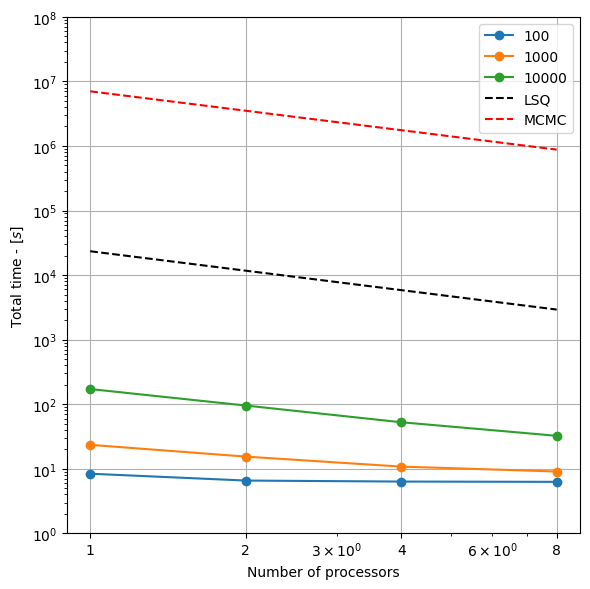

In [4]:
print("\n# Generating Timing Plots")
print("="*50)

# Generate comprehensive timing plots
ig.timing_plot(f_timing=timing_file)

print(f"Timing plots generated with prefix: {timing_file.split('.')[0]}")
print("Generated plots include:")
print("- Total execution time analysis")
print("- Forward modeling performance and speedup")
print("- Rejection sampling scaling analysis") 
print("- Posterior statistics performance")
print("- Cumulative time breakdowns")

## Medium Scale Timing Test

This example shows how to run a more comprehensive timing test with larger datasets.
Uncomment the code below to run a medium-scale test (takes longer to complete).

In [5]:
# Uncomment the block below for medium-scale timing test
"""
print("\n# Running Medium Scale Timing Test")
print("="*50)

# Define medium-scale test parameters  
N_arr_medium = [100, 500, 1000, 5000, 10000]  # Medium dataset sizes
Nproc_arr_medium = [1, 2, 4, 8]               # More processor counts

# Run timing computation
timing_file_medium = ig.timing_compute(N_arr=N_arr_medium, Nproc_arr=Nproc_arr_medium)

print(f"Medium-scale timing results saved to: {timing_file_medium}")

# Generate plots
ig.timing_plot(f_timing=timing_file_medium)
print(f"Medium-scale timing plots generated with prefix: {timing_file_medium.split('.')[0]}")
"""

'\nprint("\n# Running Medium Scale Timing Test")\nprint("="*50)\n\n# Define medium-scale test parameters  \nN_arr_medium = [100, 500, 1000, 5000, 10000]  # Medium dataset sizes\nNproc_arr_medium = [1, 2, 4, 8]               # More processor counts\n\n# Run timing computation\ntiming_file_medium = ig.timing_compute(N_arr=N_arr_medium, Nproc_arr=Nproc_arr_medium)\n\nprint(f"Medium-scale timing results saved to: {timing_file_medium}")\n\n# Generate plots\nig.timing_plot(f_timing=timing_file_medium)\nprint(f"Medium-scale timing plots generated with prefix: {timing_file_medium.split(\'.\')[0]}")\n'

## Full Scale Timing Test  

For production timing analysis, you can run the full test with the default parameters.
This will test a wide range of dataset sizes and all available processor counts.

In [6]:
# Uncomment the block below for full-scale timing test (takes significant time)
"""
print("\n# Running Full Scale Timing Test")
print("="*50)

# Run with default parameters (comprehensive test)
timing_file_full = ig.timing_compute()  # Uses default N_arr and Nproc_arr

print(f"Full-scale timing results saved to: {timing_file_full}")

# Generate comprehensive plots
ig.timing_plot(f_timing=timing_file_full)
print(f"Full-scale timing plots generated with prefix: {timing_file_full.split('.')[0]}")
"""

'\nprint("\n# Running Full Scale Timing Test")\nprint("="*50)\n\n# Run with default parameters (comprehensive test)\ntiming_file_full = ig.timing_compute()  # Uses default N_arr and Nproc_arr\n\nprint(f"Full-scale timing results saved to: {timing_file_full}")\n\n# Generate comprehensive plots\nig.timing_plot(f_timing=timing_file_full)\nprint(f"Full-scale timing plots generated with prefix: {timing_file_full.split(\'.\')[0]}")\n'

## Custom Timing Configuration

You can also customize the timing test for specific scenarios

In [7]:
print("\n# Example: Custom Timing Configuration")
print("="*50)

# Example: Focus on specific dataset sizes of interest
N_arr_custom = [1000, 5000, 10000]  # Focus on medium-large datasets
Nproc_arr_custom = [1, 4, 8]        # Test specific processor counts

print(f"Custom test configuration:")
print(f"Dataset sizes: {N_arr_custom}")  
print(f"Processor counts: {Nproc_arr_custom}")
print(f"This configuration tests {len(N_arr_custom)} × {len(Nproc_arr_custom)} = {len(N_arr_custom) * len(Nproc_arr_custom)} combinations")

# Uncomment to run custom timing test
"""
timing_file_custom = ig.timing_compute(N_arr=N_arr_custom, Nproc_arr=Nproc_arr_custom)
ig.timing_plot(f_timing=timing_file_custom)
print(f"Custom timing analysis complete: {timing_file_custom}")
"""


# Example: Custom Timing Configuration
Custom test configuration:
Dataset sizes: [1000, 5000, 10000]
Processor counts: [1, 4, 8]
This configuration tests 3 × 3 = 9 combinations


'\ntiming_file_custom = ig.timing_compute(N_arr=N_arr_custom, Nproc_arr=Nproc_arr_custom)\nig.timing_plot(f_timing=timing_file_custom)\nprint(f"Custom timing analysis complete: {timing_file_custom}")\n'

## Understanding Timing Results

The timing analysis provides insights into:

### Performance Scaling
- How execution time varies with dataset size
- Parallel efficiency across different processor counts
- Identification of computational bottlenecks

### Component Analysis  
- Relative time spent in each workflow component
- Which components benefit most from parallelization
- Memory vs compute-bound identification

### Comparison Baselines
- Performance relative to traditional least squares methods
- Comparison with MCMC sampling approaches
- Cost-benefit analysis of different configurations

### Optimization Guidance
- Optimal processor counts for different dataset sizes
- Sweet spots for price-performance ratios
- Scaling behavior for production deployments

## Tips for Timing Analysis

1. **Start Small**: Begin with quick tests using small N_arr and Nproc_arr
2. **System Warm-up**: First runs may be slower due to system initialization
3. **Resource Monitoring**: Monitor CPU, memory usage during large tests
4. **Reproducibility**: Results may vary between runs due to system load
5. **Hardware Specific**: Results are specific to your hardware configuration
6. **Baseline Comparison**: Compare with known reference systems when possible

print("\n# Timing Analysis Complete")
print("="*50)
print("Check the generated plots for detailed performance analysis.")
print("Timing data is saved in NPZ format for further analysis if needed.")